In [1]:
%matplotlib inline
%run util_draw.py
from rootpy.io import root_open
# import sys
# from matplotlib import rc
# rc('text', usetex=True)
from ROOT import TMinuit
from functools import reduce
R.gSystem.Load('libMathMore.so')
gMin = R.gMinuit
from ExpData import ExpData
from ExpData import SimData
import ExpData as ed
import math

class InputParms:
    def __init__(self, name):
        self.name = name
        self.dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
        self.e16_sim_fn = None
        self.e16_h6r_fn = None
        self.e16_h6r_dir = 'h6recon'
        self.e16_exp_fn = None
        self.e16_h6e_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'
        self.e1f_sim_fn = None
        self.e1f_h6r_fn = None
        self.e1f_h6r_dir = 'h6recon'
        self.e1f_exp_fn = None
        self.e1f_h6e_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'

parms_t0 = InputParms('tight0')
parms_t0.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t0.e16_h6r_fn = parms_t0.e16_sim_fn
parms_t0.e16_exp_fn = 'e16_exp_h6_t0_nopcor.root' #'e16_exp_h6_top1.root'
parms_t0.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t0.e1f_h6r_fn = parms_t0.e1f_sim_fn
parms_t0.e1f_exp_fn = 'e1f_exp_h6_top1.root'

parms_t1 = InputParms('tight1')
parms_t1.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t1.e16_h6r_fn = 'e16_sim_skim_top1_175_275_t1.root'
parms_t1.e16_h6r_dir = 'tight3_h6recon'
parms_t1.e16_exp_fn = 'e16_exp_h6_t1_nopcor.root'
parms_t1.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t1.e1f_h6r_fn = 'e1f_sim_skim_top1_175_275_t1.root'
parms_t1.e1f_h6r_dir = 'tight3_h6recon'
parms_t1.e1f_exp_fn = 'e1f_exp_h6_t1.root'

parms_t2 = InputParms('tight2')
parms_t2.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t2.e16_h6r_fn = 'e16_sim_skim_top1_175_275_t2.root'
parms_t2.e16_h6r_dir = 'tight3_h6recon'
parms_t2.e16_exp_fn = 'e16_exp_h6_t2_nopcor.root'
parms_t2.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t2.e1f_h6r_fn = 'e1f_sim_skim_top1_175_275_t2.root'
parms_t2.e1f_h6r_dir = 'tight3_h6recon'
parms_t2.e1f_exp_fn = 'e1f_exp_h6_t2.root'

parms_t3 = InputParms('tight3')
parms_t3.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t3.e16_h6r_fn = parms_t0.e16_sim_fn
parms_t3.e16_h6r_dir = 'tight3_h6recon'
parms_t3.e16_exp_fn = 'e16_exp_h6_t3_nopcor.root'
parms_t3.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t3.e1f_h6r_fn = parms_t0.e1f_sim_fn
parms_t3.e1f_h6r_dir = 'tight3_h6recon'
parms_t3.e1f_exp_fn = 'e1f_exp_h6_t3.root'

In [2]:
E1F_E0 = 5.497
E16_E0 = 5.754
E1F_LUM = 19.8e6 #19.844e6
E16_LUM = 28.1e6

PI = 3.14159265358979312
FSC = 0.00729735253
A = FSC
NA = 6.02214129E23
QE = 1.60217646E-19
MP = 0.93827203
MOMEGA = 0.78265
WOMEGA = 0.00849
BR = 0.891

def mdraw2d(hists, rows=2, cols=3, xlabel='', ylabel='',
            xlims=None, ylims=None, vmin=None, vmax=None,
            space=0, grid=False, figsize=None, **kwargs):
    nr, nc = rows, cols
    if figsize is None:
        figsize=goldenaspect(6.5,nr,nc)
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nr, nc, wspace=space, hspace=2*space, left=0.1, right=0.95, bottom=0.175)
    im = None
    gmin = min([h.GetMaximum() for h in hists]) if vmin is None else vmin
    gmax = max([h.GetMaximum() for h in hists]) if vmax is None else vmax
    mult = 1.0 if gmin<=0.9*gmax else 0.9
    vmax = mult*gmax if vmax is None else vmax
    for irow in range(0,nr):
        for icol in range(0,nc):
            hnum = nc*irow+(icol+1)
            h = hists[hnum-1]
            ax = plt.subplot(gs[irow, icol])
            im = rplt.imshow(asrootpy(h), axes=ax, vmin=vmin, vmax=vmax, **kwargs)
#             rplt.hist2d(h, axes=ax, **kwargs) #, norm=LogNorm())
            if xlims is not None:
                plt.xlim(xlims)
            if ylims is not None:
                plt.ylim(ylims)
            if icol > 0:
                ax.set_yticklabels('')
            if irow+1 < nr:
                ax.set_xticklabels('')
            if grid is True:
                plt.grid()
    fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    return fig

def nu(w, q2):
    return (w*w-MP*MP+q2)/(2*MP)


def epsilon(w, q2, e0):
    n = nu(w, q2)
    e1 = e0-n
    epsInv = 1+2*(q2+n*n)/(4*e0*e1-q2)
    return 1.0/epsInv


def vgflux(w, q2, e0):
    eps = epsilon(w, q2, e0)
    return A*w*(w*w-MP*MP)/(4*PI*e0*e0*MP*MP*q2*(1-eps))


def xbjork(w, q2):
    return q2/(2*MP*nu(w, q2))


def get_kfac(W):
    m, M = MOMEGA, MP
    return 1/((1/(2*W)*math.sqrt(m**4-2*m**2*M**2-2*m**2*W**2+M**4-2*M**2*W**2+W**4))/((W**2-M**2)/(2*W)))

def interp_nn(h, ibin0):
    iL,iR = 0,0
    vL,vR = 0,0
    eL,eR = 0,0
    for ibin in range(ibin0+1,h.GetNbinsX()+1):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iR = ibin
            vR = v
            eR = e
            break
    for ibin in reversed(range(1,ibin0)):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iL = ibin
            vL = v
            eL = e
            break
    vL = vR if iL==0 else vL
    vR = vL if iR==0 else vR
    e = (eL**2+eR**2)**0.5
    if vL == vR:
        return (vL, e)
    else:
        #y = y1+m(x-x1)
        m = (vR-vL)/(iR-iL)
        return (vL+m*(ibin0-iL), e)

def w8d_Q2_mean(Q2_0, Q2_1):
    n = math.log(Q2_1)-math.log(Q2_0)
    d = 1/Q2_0-1/Q2_1
    return n/d

In [3]:
w, q2 = 2, 2.5
print(2*(vgflux(w, q2, E16_E0)-vgflux(w, q2, E1F_E0))/(vgflux(w, q2, E16_E0)+vgflux(w, q2, E1F_E0)))

0.015206718216860773


In [172]:
def calc_diff_xsects(W, Q2, exparms, suppress_chatter=False,
                     h2rad=None, effabs=1, bgwbias=0.9,
                     fillholes=False, suffix=''):
    struct_funcs = []
    binned, sim, e0, lum, sim_err_0, sim_lo_acc = exparms
    h2_exp_set = binned.get_h2s(W, Q2, abs_eff=effabs, bgw_bias=bgwbias)
    h2_sim_set = sim.get_acc2d(W, Q2, sim_err_0, sim_lo_acc)
    h2e = h2_exp_set[0].Clone('%s_diffs_%s'%(h2_exp_set[0].GetName(),suffix))
    
    if h2rad is not None:
        _, _, _W, _ = ed.get_adjusted_edges(h2rad.GetXaxis(), W)
        _, _, _Q2, _ = ed.get_adjusted_edges(h2rad.GetYaxis(), Q2)
        bW, bQ2 = h2rad.GetXaxis().FindBin(_W), h2rad.GetYaxis().FindBin(_Q2)
        w8 = h2rad.GetBinContent(bW, bQ2)
        h2e.Scale(w8)
#     h2e.Scale(1/effabs)
    
    h2e_b4acc = h2_exp_set[0]
    
    h2a = h2_sim_set[0][4]

    h2e.Divide(h2a)

    result = h2_exp_set[1]

    hacc,herr = ed.get_vhists(h2_sim_set[0][2])
    hacc_m, herr_m = ed.get_vhists(h2_sim_set[0][4])
    hacc.SetBinContent(1,0)
    herr.SetBinContent(1,0)
    hacc_m.SetBinContent(1,0)
    herr_m.SetBinContent(1,0)

    if not suppress_chatter:
        fig = mdraw([hacc,herr], 2,1)
#         for h,ax in zip([hacc_m, herr_m], fig.get_axes()):
#             X, Y = list(h.x()), list(h.y())
#             ax.plot(X, Y, 'go')
        for ax in fig.get_axes():
            ax.set_xlim(0, 0.4)
            ax.set_ylim(0)
            ax.grid()
        fig2 = mdraw([hacc_m, herr_m], 2,1)
        for ax in fig2.get_axes():
            ax.set_xlim(0, 0.4)
            ax.set_ylim(0)
            ax.grid()
        # draw(hacc)
        # plt.ylim(0)
        # plt.xlim(0,0.2)
        # draw(herr)
        # plt.ylim(0)
        # plt.xlim(0,0.2)

    if not suppress_chatter:
        hmmp_exp = result[2]
        fig = draw(hmmp_exp)
        hmmp_sim = sim.get_hmmp(W,Q2)
        hmmp_sim.Scale(0.75*hmmp_exp.GetMaximum()/hmmp_sim.GetMaximum())
        X, Y = list(hmmp_sim.x()), list(hmmp_sim.y())
        plt.plot(X, Y, 'b-')
        fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
        X, Y = zip(*fitted_points)
        Y_bg = [ed.bgfun([x], result[3]) for x in X]
        plt.plot(X, Y)
        plt.plot(X, Y_bg)
        plt.vlines(0.825,0,3500)
        plt.vlines(0.755,0,3500)
        plt.grid()
        plt.show()

    hs = [h2e_b4acc,h2a,h2e]

    if not suppress_chatter:
        fig = mdraw(hs,3,1)
        for h,ax in zip(hs,fig.axes):
            im = rplt.imshow(asrootpy(h), axes=ax)
            plt.colorbar(im, ax=ax) #clim=(h.GetMinimum(),h.GetMaximum()), ax=ax)
            plt.tight_layout()

    W, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(0), W)
    Q2, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(1), Q2)
    avgQ2 = w8d_Q2_mean(Q2[0],Q2[1])
    avgW = sum(W)/2 if isinstance(W, list) else W
    dW = 0.02 if not isinstance(W, list) else W[1]-W[0]
    dQ2 = 0.05 if not isinstance(Q2, list) else Q2[1]-Q2[0]
    dPHI, dCOST = 2*PI/18, 0.2
    xb = xbjork(avgW, avgQ2)
    eps = epsilon(avgW, avgQ2, e0)
    eps_l = (avgQ2/(nu(avgW,avgQ2)**2))*eps
    flux = vgflux(avgW, avgQ2, e0)
    normval = BR*lum*flux*dW*dQ2*dCOST*dPHI
    if not suppress_chatter:
        print('h2e_b4acc int: %.1f (normed: %.1f)'%(h2e_b4acc.Integral('width'), h2e_b4acc.Integral('width')/normval))
        print('h2e_afacc int: %.1f (normed: %.1f)'%(h2e.Integral('width'), h2e.Integral('width')/normval))
        print('-----')
    
    h2e.Scale(1/normval)
    
    m = MOMEGA
    M = MP
#     kin_factor = 1/(2*avgW)*math.sqrt(m**4-2*m**2*M**2-2*m**2*avgW**2+M**4-2*M**2*avgW**2+avgW**4)
#     kin_factor /= (avgW**2-M**2)/(2*avgW)
#     kin_factor = 1/get_kfac(avgW) #p/k
    def dcoss(x, p):
        A_TOT = 1
        A_TT = eps*math.cos(2*x[0])
        A_LT = math.sqrt(2*eps*(1+eps))*math.cos(x[0])
        return A_TOT*p[0]+A_TT*p[1]+A_LT*p[2]

    fcoss = R.TF1('fcoss', dcoss, -PI, PI, 3)
    fpol0 = R.TF1('fpol0', lambda x,p: p[0], -PI, PI, 1)
    fcoss.SetParLimits(0,0,3000)
    hphis, holes, pcoss, ppol0s = [], [], [], []
    hphi_all = asrootpy(h2e.ProjectionX('%s_all'%(h2e.GetName()), 0,-1))
    
    for ibin in range(1,h2e.GetNbinsY()+1):
        hphi = h2e.ProjectionX('%sPHI_%d'%(h2e.GetName(),ibin),ibin,ibin)
        
        if hphi.GetEntries()==0:
            print('EMPTY phi hist in bin %d of cos(theta) W=%.3f, Q2=%.3f.'%(ibin,avgW,avgQ2))
            hphi.SetBinContent(1,0)
            hphi.SetBinError(1,0)
        hphi = asrootpy(hphi)
#         hphi.Scale(1/normval) #replaced by h2e.Scale above
        these_holes = hphi.Clone('%s_holes_%s'%(h2e.GetName(),suffix))
        these_holes.Reset()
        for ix in range(1,hphi.GetNbinsX()+1):
            if hphi.GetBinError(ix) == 0:
                nnval, nnerr = interp_nn(hphi, ix)
                these_holes.SetBinContent(ix, nnval)
                these_holes.SetBinError(ix, nnerr)
                if fillholes:
                    h2e.SetBinContent(ix,ibin,nnval)
                    h2e.SetBinContent(ix,ibin,nnerr)
#                 hphi.SetBinContent(ix, nnval)
#                 hphi.SetBinError(ix, nnerr)
        hphi.Fit(fpol0, 'N0F', 'goff')
        fcoss_p0 = fpol0.GetParameter(0) #/kin_factor
        fcoss_e0 = fpol0.GetParError(0)  #/kin_factor
        ppol0s.append((fpol0.GetParameter(0), fpol0.GetParError(0)))
        #let parameter 0 go lower when there are holes in the data
#         fcoss.SetParLimits(0, fcoss_p0-(3+0.5*len(these_holes))*fcoss_e0, fcoss_p0+3*fcoss_e0)
        fcoss.SetParLimits(0, fcoss_p0-3*fcoss_e0, fcoss_p0+3*fcoss_e0)
        hphi.Fit(fcoss, 'N0', 'goff')
        fcoss_parms = [(fcoss.GetParameter(i),fcoss.GetParError(i)) for i in range(0,3)]
        if not suppress_chatter:
            print('\n'.join([str(parm) for parm in fcoss_parms]))
            print('-')
        cost = h2e.GetYaxis().GetBinCenter(ibin)
        pcoss.append([avgW, avgQ2, cost, fcoss_parms])
        hphi_all.add(these_holes)
        holes.append(these_holes)
        hphis.append(hphi)
        
    hphi_singles = [hphi_all]
    hphi_all.Scale(dCOST*2*PI)
    hphi_all.Fit(fpol0, 'N0F', 'goff')
    fcoss_p0 = fpol0.GetParameter(0) #/kin_factor
    fcoss_e0 = fpol0.GetParError(0)  #/kin_factor
    fcoss.SetParLimits(0, fcoss_p0-3*fcoss_e0, fcoss_p0+3*fcoss_e0)
    hphi_all.Fit(fcoss, 'N0', 'goff')
    hphi_singles.append([(fcoss.GetParameter(i),fcoss.GetParError(i)) for i in range(0,3)])
#     err = R.Double(0.0)
#     val = hphi_all.IntegralAndError(0,-1,err, 'width')
#     print(val,err)
        
    if not suppress_chatter:
        fig_phi_all = draw(hphi_all)
        fcoss_parms = [(fcoss.GetParameter(i),fcoss.GetParError(i)) for i in range(0,3)]
        Xlin = np.linspace(-PI, PI)
        for iparm, (parm,err) in enumerate(fcoss_parms):
            fcoss.SetParameter(iparm, parm)
        Ycoss = [fcoss.Eval(x) for x in Xlin]
        plt.plot(Xlin, Ycoss, 'g')
        plt.show()
        print('\n'.join([str(parm) for parm in fcoss_parms]))
        print('-')
        
    if not suppress_chatter:
        fig = mdraw(hphis, 2,5)
        for i,ax in enumerate(fig.axes):
            Xlin = np.linspace(-PI, PI)
            for iparm, (parm,err) in enumerate(pcoss[i][3]):
                fcoss.SetParameter(iparm, parm)
            Ycoss = [fcoss.Eval(x) for x in Xlin]
            ax.plot(Xlin, Ycoss, 'g')
            XY = [(x, y) for (x, y) in zip(list(holes[i].x()), list(holes[i].y())) if y!=0]
            Yerr = [yerr[0] for (x, yerr) in zip(list(holes[i].x()), list(holes[i].yerr())) if yerr[0]!=0]
            if len(XY)>0:
                X, Y = zip(*XY)
                ax.errorbar(X, Y, Yerr, fmt='ro', zorder=20)
            ax.hlines(ppol0s[i][0], -PI, PI, 'r')
            (ppol0, ppol0e) = ppol0s[i]
#             ppol0_lo = ppol0-(3+0.5*len(XY))*ppol0e
            ppol0_lo = ppol0-3*ppol0e
            ppol0_hi = ppol0+3*ppol0e
            ax.hlines(ppol0_lo, -PI, PI, 'r', linestyles='dashed')
            ax.hlines(ppol0_hi, -PI, PI, 'r', linestyles='dashed')
            ax.grid()
    #         ax.vlines(X, -1000, 3000, 'r', linestyles='dashed')
    plt.show()

    int_2d = 0
    int_2d_b = 0
    for hphi,these_holes in zip(hphis, holes):
        int_2d += hphi.Integral('width')*dCOST
        int_2d_b += hphi.Integral('width')*dCOST
        int_2d_b += these_holes.Integral('width')*dCOST
    
    int_2d_0 = 0
    int_2d_1 = 0
    for pcos in pcoss:
        for iparm, (parm,err) in enumerate(pcos[3]):
            fcoss.SetParameter(iparm, parm)
        int_2d_0 += sum([fcoss.Eval(x) for x in hphi.x()])*dCOST*dPHI
        int_2d_1 += pcos[3][0][0]*dCOST*2*math.pi #*kin_factor
    
    if not suppress_chatter:
        print('bjorken=%.3f'%xb)
        print('Q2=%.3f'%avgQ2)
        print('W=%.3f'%avgW)
        print('epsilon=%.3f'%eps)
        print('xsect_f=%.1f (alt: %.1f)'%(int_2d_0, int_2d_1))
        print('xsect_d=%.1f (alt: %.1f)'%(int_2d, int_2d_b))
    return (xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss, h2e, hphi_singles)

In [26]:
def xsects(W0, W1, Q2ranges, parms=parms_t0):
    e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                         h6dir=parms.e1f_h6e_dir)
    e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                         h6dir=parms.e16_h6e_dir)
    
    e16_sim = SimData()
    e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                    h6rdir=parms.e16_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))

    e1f_sim = SimData()
    e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                    h6rdir=parms.e1f_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
        
    e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
    e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)

    Ws = np.arange(W0, W1, 0.02)

    e1f_xsects, e16_xsects = [], []
    for Q2 in Q2ranges:
        e1f_xsects.append([calc_diff_xsects(w, Q2, e1f_exparms, True) for w in Ws])
        e16_xsects.append([calc_diff_xsects(w, Q2, e16_exparms, True) for w in Ws])

    for e1f_xsect, e16_xsect in zip(e1f_xsects, e16_xsects):
        e1f_avgQ2 = e1f_xsect[0][1]
        e16_avgQ2 = e16_xsect[0][1]
        
        XY = [(xsect[2], xsect[5]) for xsect in e1f_xsect]
        X,Y = zip(*XY)
        ymax0 = max(Y)
        plt.plot(X, Y, 'o', label='e1f, %.3f'%e1f_avgQ2)
        
        XY = [(xsect[2], xsect[5]) for xsect in e16_xsect]
        X,Y = zip(*XY)
        ymax1 = max(Y)
        plt.plot(X, Y, 'o', label='e16, %.3f'%e16_avgQ2)
        
        plt.ylim(0, 1.1*max([ymax0,ymax1]))
        plt.grid()
        plt.legend()
        plt.show()
        
        # e1?_xsects contains a list for each Q2 range;
        # each Q2 range list contains
        #    xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
        # where W and Q2 are ranges and pcoss is a list of
        #    avgW, avgQ2, cost, fcoss_parms
        # and fcoss_parms is a list of tuples where each tuple
        # is (parm_value, parm_error).
    return (e16_xsects, e1f_xsects)

In [27]:
def xsects(W0, W1, Q2ranges, parms=parms_t0):
    e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                         h6dir=parms.e1f_h6e_dir)
    e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                         h6dir=parms.e16_h6e_dir)
    
    e16_sim = SimData()
    e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                    h6rdir=parms.e16_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))

    e1f_sim = SimData()
    e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                    h6rdir=parms.e1f_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
        
    e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.025)
    e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.15, 0.025)

    Ws = np.arange(W0, W1, 0.02)

    e1f_xsects, e16_xsects = [], []
    for Q2 in Q2ranges:
        e1f_xsects.extend([calc_diff_xsects(w, Q2, e1f_exparms, True, parms.h2rad, effabs=parms.e1f_abseff) for w in Ws])
        e16_xsects.extend([calc_diff_xsects(w, Q2, e16_exparms, True, parms.h2rad, effabs=parms.e16_abseff) for w in Ws])
        
        # e1?_xsects contains a list of
        #    xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
        # where W and Q2 are ranges and pcoss is a list of
        #    avgW, avgQ2, cost, fcoss_parms
        # and fcoss_parms is a list of tuples where each tuple
        # is (parm_value, parm_error).
    return (e16_xsects, e1f_xsects)

In [28]:
def get_exp_parms(q2str, name=None, wmax=2.6,
                  q2ranges=None,
                  fn_h2rad='../e1f6/test/hQ2W_rad_corr.root'): #fn_h2rad=None):
    if name is None:
        name = q2str
    parms = InputParms(name)
    parms.e16_sim_fn = 'e16_sim_skim_top1_%s_ho.root'%q2str
    parms.e16_h6r_fn = 'e16_sim_skim_top1_%s_ho_b.root'%q2str.replace('.','').replace('-','_') #parms.e16_sim_fn
#     parms.e16_h6r_fn = 'e16_sim_skim_top1_%s_t1_ho.root'%q2str.replace('.','').replace('-','_')
    parms.e16_h6r_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'
    parms.e16_exp_fn =  'e16_skim_small_h6_t0_nphe.root' # 'e16_skim_small_eloose_h6_t0.root'
#     parms.e16_exp_fn =  'e16_skim_small_h6_t1.root'
    parms.e1f_sim_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str
    parms.e1f_h6r_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str.replace('.','').replace('-','_') #parms.e1f_sim_fn
#     parms.e1f_h6r_fn = 'e1f_sim_skim_top1_%s_t1_ho.root'%q2str.replace('.','').replace('-','_')
    parms.e1f_h6r_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'
    parms.e1f_exp_fn =  'e1f_skim_small_h6_t0_nphe.root' # 'e1f_skim_small_eloose_h6_t0.root'
#     parms.e1f_exp_fn =  'e1f_skim_small_h6_t1.root'
    parms.h2rad = None
    if fn_h2rad is not None:
        with root_open(fn_h2rad) as fin:
            h2rad = fin['hQ2W_corr']
            h2rad.SetDirectory(0)
            parms.h2rad = asrootpy(h2rad)
    if q2ranges is None:
        (q2_0, q2_1) = [float(q2) for q2 in q2str.split('-')]
        parms.q2ranges = [[q2_0+0.16, q2_0+0.45],
                          [q2_0+0.46, q2_1-0.25]]
    else:
        parms.q2ranges = q2ranges
    parms.wmax = wmax
    parms.acc_lo = 0.025
    parms.err_hi = 0.15
    parms.e1f_abseff = 0.78 #from recook comparison
    parms.e16_abseff = 1.0
    return parms

parms_exp_q2strs = ['1.75-2.75', '2.25-3.25', '2.75-3.75',
                    '3.25-4.25', '3.75-4.75', '4.25-5.25']
parms_exp_wmaxs = [2.6, 2.55, 2.3, 2.2, 2.1, 2, 2]
# parms_exp_wmaxs = [2.6]*6
parms_exps = [get_exp_parms(q2str) for q2str in parms_exp_q2strs]
for (wmax, parms) in zip(parms_exp_wmaxs, parms_exps):
    parms.wmax = wmax

parms_exps[0].q2ranges=[[1.9,2.2], [2.2,2.5]]
parms_exps[1].q2ranges=[[2.5,2.9]]
parms_exps[2].q2ranges=[[2.9,3.35]]
parms_exps[3].q2ranges=[[3.35,3.85]]
parms_exps[4].q2ranges=[[3.85,4.65]]
parms_exps[5].q2ranges=[[4.65,5.15]]
# parms_exps[3].q2ranges=[[3.35,4.15]]
# parms_exps[4].q2ranges=[[3.85,4.65]]
# parms_exps[5].q2ranges=[[4.35,5.15]]

In [29]:
# (e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, 2.3, [[2.85, 3.15], [3.15, 3.65]], parms_exps[2])
for p in parms_exps:
    print(p.q2ranges)

[[1.9, 2.2], [2.2, 2.5]]
[[2.5, 2.9]]
[[2.9, 3.35]]
[[3.35, 3.85]]
[[3.85, 4.65]]
[[4.65, 5.15]]


In [30]:
parms = parms_exps[0]
e1f_sim = SimData()
e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                h6rdir=parms.e1f_h6r_dir,
                h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                     h6dir=parms.e1f_h6e_dir)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


In [31]:
e16_sim = SimData()
e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                h6rdir=parms.e16_h6r_dir,
                h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))
e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                     h6dir=parms.e16_h6e_dir)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


found h6treff


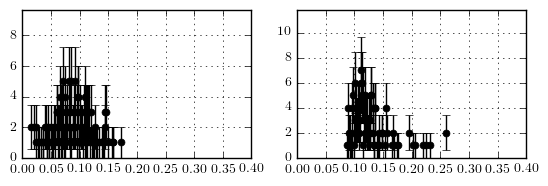

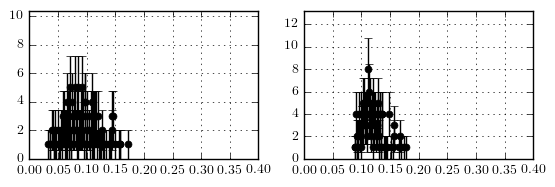

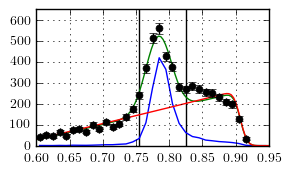

h2e_b4acc int: 159.3 (normed: 112.9)
h2e_afacc int: 2041.5 (normed: 1446.9)
-----
(142.08679654094985, 12.138322194569511)
(12.816437121667205, 23.160503509665286)
(-5.496784166894445, 10.589588811929543)
-
(127.32177452468274, 12.379174973483792)
(31.3162197336295, 24.571570472151887)
(-14.73541748062938, 11.358190616669829)
-
(117.4532264077757, 13.664646415892065)
(10.623152610030276, 26.37085132252216)
(-24.882279750009122, 11.288961264978216)
-
(69.55126103179268, 12.208269627635051)
(48.553413889504995, 22.482498167184502)
(-12.698854159227063, 10.637067520455654)
-
(68.56026338059006, 14.43234283193414)
(31.498194431564116, 25.34428559808438)
(-9.068809080258804, 12.994636456214446)
-
(81.74253111438975, 16.904038820191392)
(-3.914761200156314, 28.25549556214441)
(25.63773287896284, 14.705600777080905)
-
(88.2499769656558, 17.790374652996903)
(9.423391656719117, 29.343740605964502)
(40.193480476222426, 17.77378025449899)
-
(108.66629974220511, 17.975595324397638)
(37.15280721758

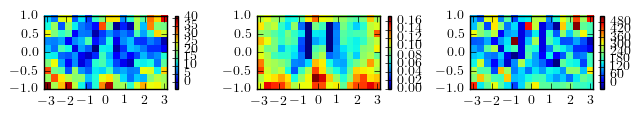

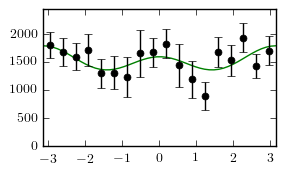

(1529.383279989492, 64.66514994375189)
(212.08897462894092, 115.74849035465436)
(-59.477081320941735, 55.947800351574244)
-


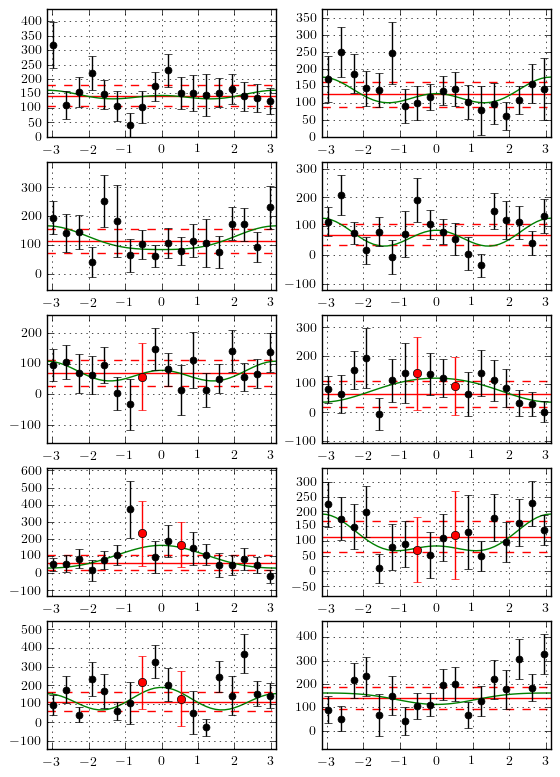

bjorken=0.480
Q2=2.344
W=1.850
epsilon=0.771
xsect_f=1339.0 (alt: 1339.0)
xsect_d=1446.9 (alt: 1532.4)


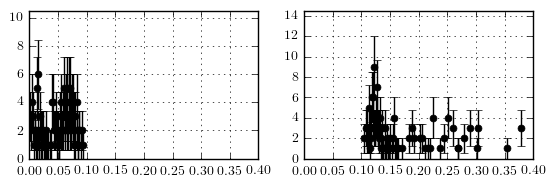

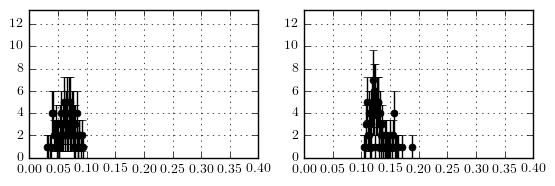

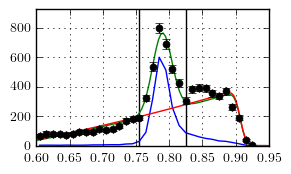

h2e_b4acc int: 145.7 (normed: 71.7)
h2e_afacc int: 2699.9 (normed: 1328.8)
-----
(202.4183038578038, 15.705255980411678)
(-3.8828317280529188, 27.830909925108408)
(6.991134249068241, 13.628295014190954)
-
(142.90292831867916, 14.82061280591914)
(7.9110683064884855, 26.18198762651722)
(-18.572942902808066, 12.830802812191848)
-
(117.56332767093826, 18.099921625035826)
(35.712258561650856, 33.152863522249106)
(-27.737402667467755, 14.468594066899419)
-
(100.66653809609457, 21.778595683478024)
(38.868057089142866, 34.529041814688476)
(-22.212243182645743, 16.39713978107428)
-
(84.61325824688129, 24.31417839361997)
(17.225807149723078, 37.2899229262447)
(-2.268530838662985, 16.153071485400837)
-
(45.232866835910734, 21.925278123285175)
(18.130944795517053, 32.13691528682744)
(-5.909258729405777, 16.85023213219846)
-
(56.88190375813088, 29.77385741155823)
(82.11527449789769, 53.67479373980406)
(-37.53658467866044, 19.626880106049107)
-
(94.46852908291132, 29.211001220987114)
(40.38448844760

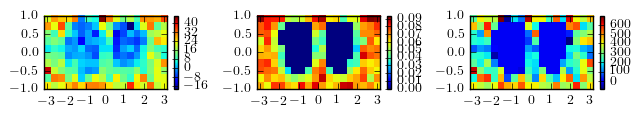

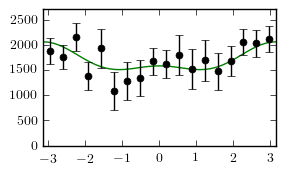

(1694.4625465720414, 73.45378262764484)
(162.49209491692756, 130.43069795193898)
(-141.5459405225299, 58.1540518611227)
-


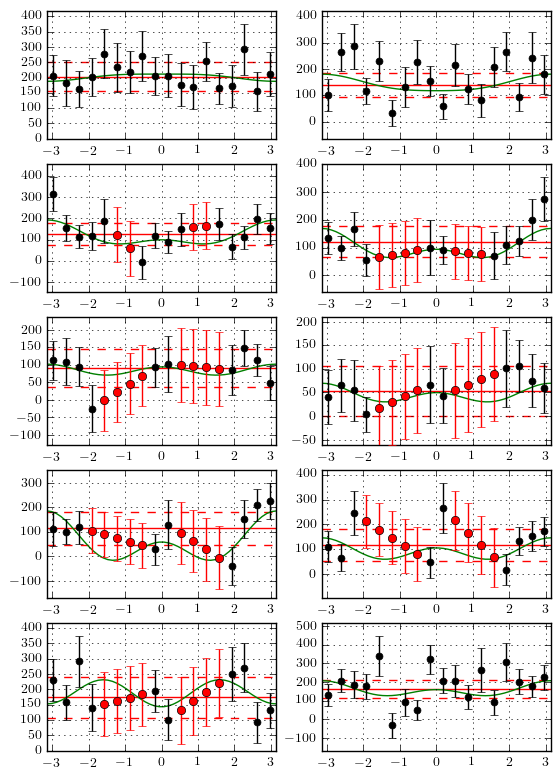

bjorken=0.480
Q2=2.344
W=1.850
epsilon=0.794
xsect_f=1496.8 (alt: 1496.8)
xsect_d=1328.8 (alt: 1694.4)


In [82]:
parms=parms_exps[0]
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.03)
diffx_res_e1f = calc_diff_xsects(1.85, [2.2,2.5], e1f_exparms, False, parms.h2rad, parms.e1f_abseff, suffix='_f')
# diffx_res_e1f = calc_diff_xsects(1.85, [1.91, 2.20], e1f_exparms, False, parms.h2rad, parms.e1f_abseff)
# diffx_res_e1f = calc_diff_xsects(1.9, [2.21,2.70], e1f_exparms, False, parms.h2rad, parms.e1f_abseff)

# parms = parms_exps[5]
# e16_sim = SimData()
# e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
#                 h6rdir=parms.e16_h6r_dir,
#                 h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))
# e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
#                      h6dir=parms.e16_h6e_dir)

e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.15, 0.03)
diffx_res_e16 = calc_diff_xsects(1.85, [2.2, 2.5], e16_exparms, False, parms.h2rad, parms.e16_abseff, suffix='_6')

In [114]:
diffx_res[6]

([1.84, 1.86], [2.2, 2.5])

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


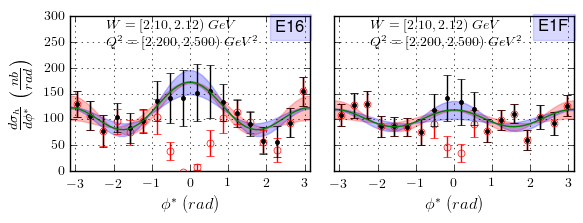

In [161]:
def plot_dxdphi(ax, diffx_res, title):
    eps = diffx_res[3]
    wr = diffx_res[6][0]
    q2r = diffx_res[6][1]
    
    def dcoss(x, p):
        A_TOT = 1
        A_TT = eps*math.cos(2*x)
        A_LT = math.sqrt(2*eps*(1+eps))*math.cos(x)
#         return A_TOT*p[0]+A_TT*p[1]+A_LT*p[2]
        return (A_TOT*p[0]+A_TT*p[1]+A_LT*p[2])/(2*PI)
    [(tot, tote), (tt,tte), (lt,lte)] = diffx_res[-1][1]
    
    hphi_hf = asrootpy(diffx_res[-1][0].clone())
    hphi = asrootpy(diffx_res[-2].ProjectionX())
    hphi.Scale(0.2*2*PI)
    hphi.Scale(1/(2*PI))
    hphi_hf.Scale(1/(2*PI))

    ax.errorbar(list(hphi.x()),
                list(hphi.y()),
                list(hphi.yerrh()),
                fmt='ro', fillstyle='none', markersize=5)

    ax.errorbar(list(hphi_hf.x()),
                list(hphi_hf.y()),
                list(hphi_hf.yerrh()),
                fmt='ko', markersize=3)
    
    Xlin = np.linspace(-PI, PI)
    Y = [dcoss(x, [tot, tt, lt]) for x in Xlin]
    Y1 = [dcoss(x, [tot, tt+tte, lt-lte]) for x in Xlin]
    Y2 = [dcoss(x, [tot, tt-tte, lt+lte]) for x in Xlin]
    Y3 = [dcoss(x, [tot, tt+tte, lt+lte]) for x in Xlin]
    Y4 = [dcoss(x, [tot, tt-tte, lt-lte]) for x in Xlin]
    ax.fill_between(Xlin, Y1, Y2, color='r', alpha=0.25)
    ax.fill_between(Xlin, Y3, Y4, color='b', alpha=0.25)
    ax.plot(Xlin, Y, 'g')
    
    ax.set_xlim(-PI,PI)
    ax.grid()
    ax.text(0.15, 0.98, r'$W = [%.2f,%.2f)$ $GeV$'%(wr[0],wr[1]),
                fontsize=10, fontweight='bold',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)
    ax.text(0.15, 0.88, r'$Q^2 = [%.3f,%.3f)$ $GeV^2$'%(q2r[0],q2r[1]),
                fontsize=10, fontweight='bold',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)
    texp = ax.text(0.98, 0.98, exp,
                fontsize=12, fontweight='bold',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes)
    texp.set_bbox(dict(color='b', alpha=0.15, edgecolor='k'))

    
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6.5,2),
                              sharey='row', sharex='col',
                              gridspec_kw={'wspace':0.1})

for ax, diffx_res, exp in zip([ax1,ax2],
                              [diffx_res_e16, diffx_res_e1f],
                              ['E16', 'E1F']):
    plot_dxdphi(ax, diffx_res, exp)


ax1.set_xlabel(r'$\phi^*$ $(rad)$', fontsize=12)
ax2.set_xlabel(r'$\phi^*$ $(rad)$', fontsize=12)
ax1.set_ylabel(r'$\frac{d\sigma_h}{d\phi^{*}}$ $\left( \frac{nb}{rad} \right)$', fontsize=14)

ymax = ax1.get_ylim()[1]
ax1.set_ylim(0, 1.2*ymax)
plt.show()

In [155]:
diffx_res_e1fS = []
diffx_res_e16S = []
for iW, W in enumerate([1.79, 1.85, 1.95, 2.1, 2.2]):
    diffx_res_e1fS.append(calc_diff_xsects(W, [2.2, 2.5], e1f_exparms, True, parms.h2rad, parms.e1f_abseff, suffix='_f'))
    diffx_res_e16S.append(calc_diff_xsects(W, [2.2, 2.5], e16_exparms, True, parms.h2rad, parms.e16_abseff, suffix='_6'))

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


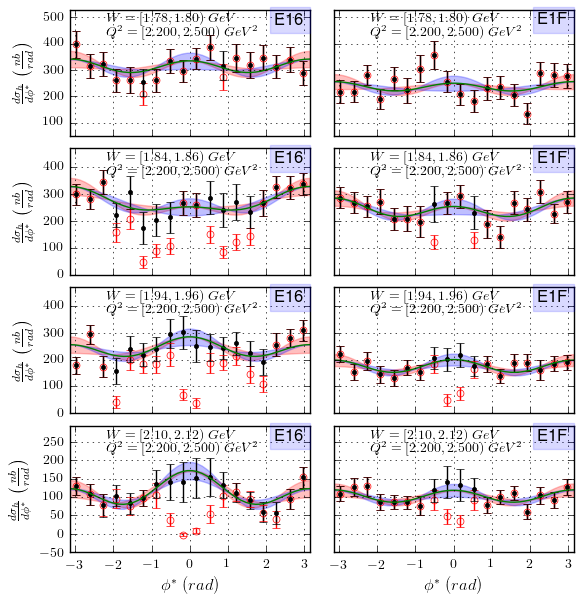

In [162]:
fig, axes = plt.subplots(4,2, figsize=(6.5,7), #goldenaspect(6.5, 5, 2),
                              sharey='row', sharex=True,
                              gridspec_kw={'wspace':0.1, 'hspace':0.1})

for iW, (diffx_res_e1f, diffx_res_e16) in enumerate(zip(diffx_res_e1fS[:-1], diffx_res_e16S[:-1])):
    for iexp, (diffx_res, exp) in enumerate(zip(
                                  [diffx_res_e16, diffx_res_e1f],
                                  ['E16', 'E1F'])):
        plot_dxdphi(axes[iW][iexp], diffx_res, exp)


#first col
for ax in [axes[iW][0] for iW in range(0,len(axes))]:
    ymax = ax.get_ylim()[1]
    ax.set_ylim(ax.get_ylim()[0], 1.175*ymax)
    ax.set_ylabel(r'$\frac{d\sigma_h}{d\phi^{*}}$ $\left( \frac{nb}{rad} \right)$',
                  fontsize=12)
#last row
for ax in axes[-1]:
    ax.set_xlabel(r'$\phi^*$ $(rad)$', fontsize=12)

fig.savefig('dxdphi_fit_samples.pdf', bbox_inches='tight')
plt.show()

In [12]:
# print(sum(sum(list(diffx_res_e1f[-1].z()),[]))*0.2*PI/18.0)
# print(len(sum(list(diffx_res_e1f[-1].z()),[])),18*10)
# print(diffx_res_e1f[-1].Integral('width'))
# sorted(sum(list(diffx_res_e1f[-1].z()),[]))

In [167]:
from scipy import optimize as so
import pandas as pd
%matplotlib inline

def legR2(x, c0, c1, c2):
    return np.polynomial.legendre.Legendre([c0,c1,c2])(x)

def legR3(x, c0, c1, c2, c3):
    return np.polynomial.legendre.Legendre([c0,c1,c2,c3])(x)

def legR2e(x, c0, c1, c2, e0, e1):
    return legR2(x, c0, c1, c2)+e0*np.exp(e1*x)

def get_xsect_dict(xsects):
    #xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
    dicts = []
    for ((Wr,Q2r), xb, eps, xtot_f, xtot_d, wq2_data, h2e, hphis) in [(xsects_1wq2bin[6], xsects_1wq2bin[0], xsects_1wq2bin[3], xsects_1wq2bin[4], xsects_1wq2bin[5], xsects_1wq2bin[7], xsects_1wq2bin[-2], xsects_1wq2bin[-1]) for xsects_1wq2bin in xsects]:
#         print(Wr,Q2r)
        xtot_d_err = R.Double(0.0)
        xtot_d_alt = h2e.IntegralAndError(0,-1,0,-1,xtot_d_err, 'width')
        (x_1_tot, x_1_tot_err), (x_1_tl, x_1_tl_err), (x_1_tt, x_1_tt_err) = hphis[1]
        for cost_data in wq2_data:
            W, Q2, cost, parms = cost_data
            W, Q2, cost = [round(x,3) for x in (W,Q2,cost)]
            (x_tot, x_tot_err), (x_tl, x_tl_err), (x_tt, x_tt_err) = parms
            _nu = nu(W, Q2)
            eps_l = Q2/_nu**2*eps
            names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'Wr0', 'Wr1', 'Q2r0', 'Q2r1',
                     'cost', 'int_f', 'int_d', 'int_d_err', 'x_tot', 'x_tot_err',
                     'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err', 'phi', 'dxs', 'dxs_err']
#             yi = h2e.GetYaxis().FindBin(cost)
#             for xi, xv in enumerate(h2e.x()):
#                 zv = h2e.z(xi,yi)
#                 ze = h2e.zerr(xi,yi)[0]
#                 vals = [_nu, xb, eps, eps_l, W, Q2, Wr[0], Wr[1], Q2r[0], Q2r[1],
#                         cost, xtot_f, xtot_d, xtot_d_err, x_tot, x_tot_err,
#                          x_tt, x_tt_err, x_tl, x_tl_err, xv, zv, ze]
#                 dicts.append({n:v for (n,v) in zip(names,vals)})
            names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'Wr0', 'Wr1', 'Q2r0', 'Q2r1',
                     'cost', 'int_f', 'int_d', 'int_d_err', 'x_tot', 'x_tot_err',
                     'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err', 'x_1_tot', 'x_1_tot_err',
                     'x_1_tl', 'x_1_tl_err', 'x_1_tt', 'x_1_tt_err']
            vals = [_nu, xb, eps, eps_l, W, Q2, Wr[0], Wr[1], Q2r[0], Q2r[1],
                    cost, xtot_f, xtot_d, xtot_d_err, x_tot, x_tot_err,
                     x_tt, x_tt_err, x_tl, x_tl_err, x_1_tot, x_1_tot_err,
                     x_1_tt, x_1_tt_err, x_1_tl, x_1_tl_err]
            dicts.append({n:v for (n,v) in zip(names,vals)})
    return dicts

def get_legs_dict(df, W, Q2, fitfunc=legR2, sfunc='x_tot'):
    df_wq2 = df[(df.W==W)&(df.Q2==Q2)]
    parm_vals, parm_errs = (0,0,0), (0,0,0)
    vals, names = [], []
    if len(df_wq2.replace(0,np.NaN).dropna()) >= 3:
        parm_vals, pcov = so.curve_fit(fitfunc, df_wq2.cost,
                                       df_wq2[sfunc],
                                       sigma=df_wq2['%s_err'%sfunc].replace(0,np.NaN),
                                       absolute_sigma=True)
        parm_errs = np.sqrt(np.diag(pcov))
        vals = [df_wq2.nu.iloc[0], df_wq2.xb.iloc[0], df_wq2.eps.iloc[0], df_wq2.eps_l.iloc[0], W, Q2]
        for v, e in zip(parm_vals, parm_errs):
            vals.extend([v,e])
        names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'D0_tot', 'D0_tot_err',
                 'D1_tot', 'D1_tot_err', 'D2_tot', 'D2_tot_err']
        if fitfunc==legR3:
            names.extend(['D3_tot', 'D3_tot_err'])
        if fitfunc==legR2e:
            names.extend(['expA_tot', 'expB_tot'])
    return ({n:v for (n,v) in zip(names,vals)})

def plots_1wq2bin(df, W, Q2, ax=None, fitfunc=legR2, sfunc='x_tot'):
    df_wq2 = df[(df.W==W)&(df.Q2==Q2)]
    fig, ax = plt.subplots() if ax is None else _, ax
    df_wq2.plot('cost', sfunc, kind='scatter', yerr='%s_err'%sfunc, ax=ax, grid=True)
    parm_vals, pcov = so.curve_fit(fitfunc, df_wq2.cost,
                                   df_wq2[sfunc],
                                   sigma=df_wq2['%s_err'%sfunc].replace(0,np.NaN),
                                   absolute_sigma=True)
    parm_errs = np.sqrt(np.diag(pcov))
#     w8s = df_wq2.x_tot_err.apply(lambda x: 1/(x**2) if x>0 else 0)
#     leg_parms = np.polynomial.legendre.legfit(df_wq2.cost.values,
#                                               df_wq2.x_tot.values,
#                                               w=w8s.values,
#                                               deg=2, full=True)
#     fleg = np.polynomial.legendre.Legendre(leg_parms[0])
    Xlin = np.linspace(-1,1)
#     Y = [fleg(x) for x in Xlin]
    Y = [fitfunc(x, *parm_vals) for x in Xlin]
    ax.plot(Xlin,Y)
#     return (leg_parms)
    
    return (parm_vals, parm_errs)

In [170]:
parms = parms_exps[0]
(e16_xsects_t0, e1f_xsects_t0) = xsects(1.73, parms.wmax, parms.q2ranges, parms)
(e16_dicts, e1f_dicts) = (get_xsect_dict(e16_xsects_t0), get_xsect_dict(e1f_xsects_t0))

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


found h6treff


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [ ]:
# (e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, 1.9, [[3.85, 4.65]], parms_exps[4])

# e16_dicts.extend(get_xsect_dict(e16_xsects_t0))
# e1f_dicts.extend(get_xsect_dict(e1f_xsects_t0))

In [173]:
for parms in parms_exps[1:]:
    (e16_xsects_t0, e1f_xsects_t0) = xsects(1.73, parms.wmax, parms.q2ranges, parms)
    e16_dicts.extend(get_xsect_dict(e16_xsects_t0))
    e1f_dicts.extend(get_xsect_dict(e1f_xsects_t0))

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
found h6treff


Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


found h6treff


EMPTY phi hist in bin 1 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 2 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 3 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 4 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 5 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 6 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 7 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 8 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 9 of cos(theta) W=1.990, Q2=4.891.
EMPTY phi hist in bin 10 of cos(theta) W=1.990, Q2=4.891.


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_4.25-5.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_4.25-5.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0_nphe.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [174]:
# df_e1f = pd.DataFrame(get_xsect_dict(e1f_xsects_t0))
# df_e16 = pd.DataFrame(get_xsect_dict(e16_xsects_t0))
# df_e1f_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR2) for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
# df_e16_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR2) for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])

df_e1f = pd.DataFrame(e1f_dicts)
df_e16 = pd.DataFrame(e16_dicts)

# df_e1f_dxs = pd.DataFrame(e1f_dicts)
# df_e16_dxs = pd.DataFrame(e16_dicts)

# names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'Wr0', 'Wr1', 'Q2r0', 'Q2r1',
#          'cost', 'int_f', 'int_d', 'int_d_err', 'x_tot', 'x_tot_err',
#          'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err']
# df_e1f = df_e1f_dxs[names].drop_duplicates()
# df_e16 = df_e16_dxs[names].drop_duplicates()

In [18]:
# print(sum(df_e1f_dxs.dxs_err>0))
# print(sum(df_e16_dxs.dxs_err>0))
vgf_a_e16, vgf_a_e1f = vgflux(1.85, 2.69, E16_E0), vgflux(1.85, 2.69, E1F_E0)
eps_a_e16, eps_a_e1f = 2.69/nu(1.85,2.69)**2*epsilon(1.85, 2.69, E16_E0), 2.69/nu(1.85,2.69)**2*epsilon(1.85, 2.69, E1F_E0)
vgf_0_e16, vgf_0_e1f = vgflux(1.84, 2.2, E16_E0), vgflux(1.84, 2.2, E1F_E0)
eps_0_e16, eps_0_e1f = 2.2/nu(1.84,2.2)**2*epsilon(1.84, 2.2, E16_E0), 2.2/nu(1.84,2.2)**2*epsilon(1.84, 2.2, E1F_E0)
vgf_1_e16, vgf_1_e1f = vgflux(1.86, 2.5, E16_E0), vgflux(1.86, 2.5, E1F_E0)
eps_1_e16, eps_1_e1f = 2.2/nu(1.86,2.5)**2*epsilon(1.86, 2.5, E16_E0), 2.2/nu(1.86,2.5)**2*epsilon(1.86, 2.5, E1F_E0)
# print(df_e1f.Q2.unique())
# print(df_e1f.Q2r0.unique())
print(vgf_0_e16, vgf_0_e1f)
print(vgf_1_e16, vgf_1_e1f)
print(eps_0_e16, eps_0_e1f)
print(eps_1_e16, eps_1_e1f)
print((eps_a_e16-eps_a_e1f)/ (eps_0_e16-eps_1_e16) )
print((vgf_a_e16-vgf_a_e1f)/ (vgf_0_e16-vgf_1_e16) )
print( (eps_a_e16-eps_a_e1f)/( eps_a_e16 ) )
print( (eps_a_e16-eps_a_e1f)/( eps_a_e1f ) )
print( (vgf_a_e16-vgf_a_e1f)/( vgf_a_e16 ) )
print( (vgf_a_e16-vgf_a_e1f)/( vgf_a_e1f ) )

0.00022010476851524013 0.0002169460970591853
0.00016981130079349644 0.00016733825250296936
0.28355888235254323 0.2761494244038986
0.23268248593650748 0.22511819517164047
0.184009198014393
0.04153362614023552
0.03568979928293528
0.037010703875574695
0.014509326001749718
0.014722946025337505


In [33]:
df = df_e16_dxs[df_e16_dxs.dxs_err>0].sort_values(by=['W', 'Q2', 'cost', 'phi']).reset_index()
df = df.merge(df_e1f_dxs[df_e1f_dxs.dxs_err>0].sort_values(by=['W', 'Q2', 'cost', 'phi']).reset_index(), on=['W', 'Q2', 'cost', 'phi'])

In [34]:
df['vgflux_x'] = df.apply(lambda x: vgflux(x.W, x.Q2, E16_E0), axis=1)
df['vgflux_y'] = df.apply(lambda x: vgflux(x.W, x.Q2, E1F_E0), axis=1)

In [45]:
df[['W', 'Q2', 'cost', 'phi', 'dxs_x', 'dxs_y', 'dxs_err_x', 'dxs_err_y']][(df.W==1.85)&(df.Q2==2.015)][['dxs_x','dxs_y']].sum()*0.2*PI/9

dxs_x    1641.148074
dxs_y    1437.237178
dtype: float64

In [130]:
df_e1f[['Q2r0','Q2r1', 'W']].drop_duplicates()

,Q2r0,Q2r1,W
0,1.85,2.20,1.73
180,1.85,2.20,1.75
360,1.85,2.20,1.77
540,1.85,2.20,1.79
720,1.85,2.20,1.81
900,1.85,2.20,1.83
1080,1.85,2.20,1.85
1260,1.85,2.20,1.87
1440,1.85,2.20,1.89
1620,1.85,2.20,1.91


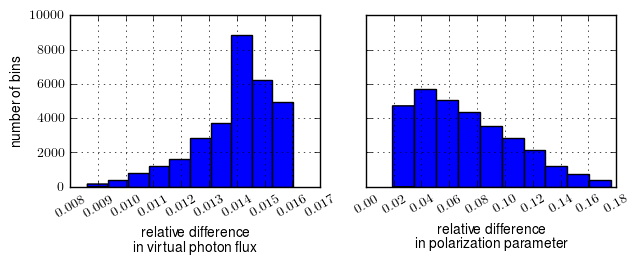

In [21]:
# Y0, X0, _ = plt.hist((df.vgflux_x-df.vgflux_y)/((df.vgflux_x+df.vgflux_y)/2))
# Y1, X1, _ = plt.hist((df.eps_x-df.eps_y)/((df.eps_x+df.eps_y)/2))
# X0 = (X0[1:]+X0[:-1])/2
# X1 = (X1[1:]+X1[:-1])/2
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(6.5,2.75))
((df.eps_x-df.eps_y)/((df.eps_x+df.eps_y)/2)).hist(ax=ax2, xrot=30)
plt.ylim(0,10000)
((df.vgflux_x-df.vgflux_y)/((df.vgflux_x+df.vgflux_y)/2)).hist(ax=ax1, xrot=30)
ax1.set_xlabel('relative difference\nin virtual photon flux')
ax2.set_xlabel('relative difference\nin polarization parameter')
ax1.set_ylabel('number of bins')
plt.tight_layout()
fig.savefig('diffs_due_to_e0.pdf', bbox_inches='tight')
# ax1.plot(X0,Y0)
# ax2.plot(X1,Y1)
# ax1.grid()
# ax2.grid()

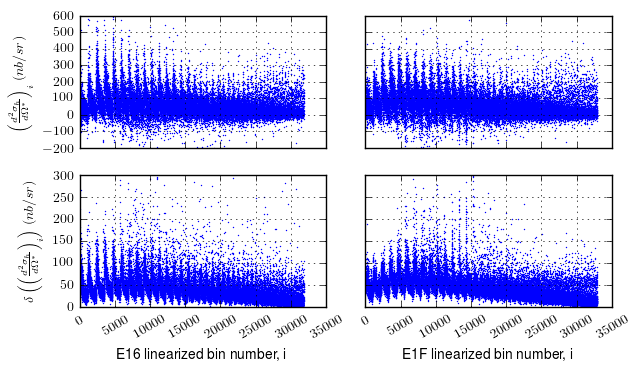

In [23]:
fig, axes = plt.subplots(2,2, sharex=True, sharey='row', figsize=goldenaspect(6.5,2,2))
(ax1,ax2,ax3,ax4) = fig.axes
df = df_e16_dxs[df_e16_dxs.dxs_err>0].sort_values(by=['W', 'Q2', 'cost', 'phi']).reset_index()
ax1.plot(df.index.values, df.dxs.values, '.', ms=1)
ax3.plot(df.index.values, (df.dxs_err).values, '.', ms=1)
# ax3.plot(df.index.values, (df.dxs_err/df.dxs).values, '-')
# locs, labels = plt.xticks()
plt.setp(ax3.get_xticklabels(), rotation=30)
df = df_e1f_dxs[df_e1f_dxs.dxs_err>0].sort_values(by=['W', 'Q2', 'cost', 'phi']).reset_index()
ax2.plot(df.index.values, df.dxs.values, '.', ms=1)
ax4.plot(df.index.values, (df.dxs_err).values, '.', ms=1)
# ax4.plot(df.index.values, (df.dxs_err/df.dxs).values, '-')
# locs, labels = plt.xticks()
plt.setp(ax4.get_xticklabels(), rotation=30)
for ax in fig.axes:
    ax.grid()
    ax.set_ylim(-200,600)
ax3.set_ylim(0,300)
# print(ax3.xaxis.get_ticklabels())
# dir(ax3.xaxis)
ax3.set_xlabel('E16 linearized bin number, i')
ax4.set_xlabel('E1F linearized bin number, i')
ax1.set_ylabel(r'$\left(\frac{d^2\sigma_h}{d\Omega^{*}}\right)_i$ $(nb/sr)$')
ax3.set_ylabel(r'$\delta\left(\left(\frac{d^2\sigma_h}{d\Omega^{*}}\right)_i\right)$ $(nb/sr)$')

plt.tight_layout()
fig.savefig('dxs_summary.pdf', bbox_inches='tight')

In [75]:
df.head(200)

,index,Q2,Q2r0,Q2r1,W,Wr0,Wr1,cost,dxs,dxs_err,...,int_f,nu,phi,x_tl,x_tl_err,x_tot,x_tot_err,x_tt,x_tt_err,xb
0,1,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,260.070862,106.788845,...,936.093447,2.199546,-2.617994,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
1,2,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,20.162458,79.895387,...,936.093447,2.199546,-2.268928,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
2,3,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,90.826035,63.978293,...,936.093447,2.199546,-1.919862,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
3,4,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,104.777168,51.064611,...,936.093447,2.199546,-1.570796,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
4,5,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,50.157231,58.029864,...,936.093447,2.199546,-1.221730,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
5,6,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,58.721909,46.114294,...,936.093447,2.199546,-0.872665,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
6,7,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,144.889466,51.613900,...,936.093447,2.199546,-0.523599,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
7,8,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,74.644446,58.373826,...,936.093447,2.199546,-0.174533,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
8,9,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,14.150844,53.642944,...,936.093447,2.199546,0.174533,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172
9,10,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,74.356741,55.050520,...,936.093447,2.199546,0.523599,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172


In [138]:
df_e1f_dxs['cost0'] = (df_e1f_dxs.cost-0.1).round(1)
df_e1f_dxs['cost1'] = (df_e1f_dxs.cost+0.1).round(1)
df_e1f_dxs['phi0'] = (df_e1f_dxs.phi-PI/18).round(2)
df_e1f_dxs['phi1'] = (df_e1f_dxs.phi+PI/18).round(2)
df_e1f_dxs['eps'] = df_e1f_dxs.eps.round(2)
df_e1f_dxs['nu'] = df_e1f_dxs.nu.round(2)
df_e1f_dxs['dxs'] = df_e1f_dxs.dxs.round(2)
df_e1f_dxs['dxs_err'] = df_e1f_dxs.dxs_err.round(2)
df_e1f_dxs['dxs'] = df_e1f_dxs.dxs.apply(lambda x: x if x!=0 else np.NaN)
df_e1f_dxs['dxs_err'] = df_e1f_dxs.dxs_err.apply(lambda x: x if x!=0 else np.NaN)
names = ['Q2r0', 'Q2r1', 'Wr0', 'Wr1', 'cost0', 'cost1', 'phi0', 'phi1', 'dxs', 'dxs_err']
df_e1f_out = df_e1f_dxs[names]
names = [r'$Q2_i$', r'$Q2_f$', r'$W_i$', r'$W_f$',
         r'$\cos{\theta_i^*}$', r'$\cos{\theta_f^*}$',
         r'$\phi_i^*$', r'$\phi_f^*$',
         r'$\left< \frac{d^2\sigma_h}{d\Omega^{*}} \right>$',
         r'$\delta \left< \frac{d^2\sigma_h}{d\Omega^{*}} \right>$']
df_e1f_out.columns = names
print(df_e1f_out[(df_e1f_out[r'$W_i$']==1.80)&(df_e1f_out[r'$Q2_i$']==2.20)].to_latex(index=False, longtable=True, escape=False))

\begin{longtable}{rrrrrrrrrr}
\toprule
 $Q2_i$ &  $Q2_f$ &  $W_i$ &  $W_f$ &  $\cos{\theta_i^*}$ &  $\cos{\theta_f^*}$ &  $\phi_i^*$ &  $\phi_f^*$ &  $\left< \frac{d^2\sigma_h}{d\Omega^{*}} \right>$ &  $\delta \left< \frac{d^2\sigma_h}{d\Omega^{*}} \right>$ \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
    2.2 &     2.5 &    1.8 &   1.82 &                -1.0 &                -0.8 &       -3.14 &       -2.79 &                                               NaN &                                                NaN \\
    2.2 &     2.5 &    1.8 &   1.82 &                -1.0 &                -0.8 &       -2.79 &       -2.44 &                                            182.74 &                                              69.64 \\
    2.2 &     2.5 &    1.8 &   1.82 &                -1.0 &                -0.8 &       -2.44 &       -2.09 &                                            268.36 &                           

In [135]:
# df_e1f_dxs.dropna()[~df_e1f_dxs.dropna().isin(df_e1f_dxs.dropna().drop_duplicates())]
df_e1f_out['$Q2_i$']

0        1.85
1        1.85
2        1.85
3        1.85
4        1.85
5        1.85
6        1.85
7        1.85
8        1.85
9        1.85
10       1.85
11       1.85
12       1.85
13       1.85
14       1.85
15       1.85
16       1.85
17       1.85
18       1.85
19       1.85
20       1.85
21       1.85
22       1.85
23       1.85
24       1.85
25       1.85
26       1.85
27       1.85
28       1.85
29       1.85
         ... 
38670    4.65
38671    4.65
38672    4.65
38673    4.65
38674    4.65
38675    4.65
38676    4.65
38677    4.65
38678    4.65
38679    4.65
38680    4.65
38681    4.65
38682    4.65
38683    4.65
38684    4.65
38685    4.65
38686    4.65
38687    4.65
38688    4.65
38689    4.65
38690    4.65
38691    4.65
38692    4.65
38693    4.65
38694    4.65
38695    4.65
38696    4.65
38697    4.65
38698    4.65
38699    4.65
Name: $Q2_i$, dtype: float64

In [179]:
print(df_e1f.columns.values)

['Q2' 'Q2r0' 'Q2r1' 'W' 'Wr0' 'Wr1' 'cost' 'eps' 'eps_l' 'int_d'
 'int_d_err' 'int_f' 'nu' 'x_1_tl' 'x_1_tl_err' 'x_1_tot' 'x_1_tot_err'
 'x_1_tt' 'x_1_tt_err' 'x_tl' 'x_tl_err' 'x_tot' 'x_tot_err' 'x_tt'
 'x_tt_err' 'xb']


In [215]:
# q20 = df_e1f.Q2.unique()[0]
names = ['Q2r0','Q2r1','Wr0','Wr1','eps',
         'x_1_tot','x_1_tot_err',
         'x_1_tt','x_1_tt_err',
         'x_1_tl','x_1_tl_err']
df_unpol_and_interf_e1f = df_e1f[names].drop_duplicates()
df_unpol_and_interf_e16 = df_e16[names].drop_duplicates()
names_new = [r'$Q^2_i$', r'$Q^2_f$', r'$W_i$', r'$W_f$', r'\epsilon',
             r'$\sigma_o$', r'\delta\sigma_o',
             r'$\sigma_{TT}$', r'\delta\sigma_{TT}',
             r'$\sigma_{LT}$', r'\delta\sigma_{LT}']
for df in [df_unpol_and_interf_e16, df_unpol_and_interf_e1f]:
    df.ix[:,'Q2r0':'eps'] = df.ix[:,'Q2r0':'eps'].round(2)
    for n in names[5:]:
        df[n] = df[n].astype('int')
#     df.ix[:,'x_1_tot':] = df.ix[:,'x_1_tot':].astype('int')
    df.columns = names_new

In [216]:
df_e1f.to_pickle('df_e1f.pickle')
df_e16.to_pickle('df_e16.pickle')
df_unpol_and_interf_e16.to_pickle('df_unpol_and_interf_e16.pickle')
df_unpol_and_interf_e1f.to_pickle('df_unpol_and_interf_e1f.pickle')

In [219]:
print(df_unpol_and_interf_e1f.to_latex(index=False, longtable=True, escape=False))

\begin{longtable}{rrrrrrrrrrr}
\toprule
 $Q^2_i$ &  $Q^2_f$ &  $W_i$ &  $W_f$ &  \epsilon &  $\sigma_o$ &  \delta\sigma_o &  $\sigma_{TT}$ &  \delta\sigma_{TT} &  $\sigma_{LT}$ &  \delta\sigma_{LT} \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
    1.85 &     2.20 &   1.72 &   1.74 &      0.84 &         960 &              48 &             77 &                 82 &             17 &                 41 \\
    1.85 &     2.20 &   1.74 &   1.76 &      0.83 &        1594 &              49 &           -132 &                 84 &             57 &                 40 \\
    1.85 &     2.20 &   1.76 &   1.78 &      0.83 &        2245 &              58 &           -141 &                101 &             49 &                 48 \\
    1.85 &     2.20 &   1.78 &   1.80 &      0.82 &        2116 &              65 &            211 &                113 &             58 &                 53 \\
    1.85 &     2.20 &   1.80 &   1.8

In [22]:
df_e1f_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR2) for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
df_e16_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR2) for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])

[ 161.17578194  -24.64856691  124.80939303]
[  6.1258382   10.52993253  13.3391785 ]
[ 187.20441527   14.6013498   107.22083168]
[  9.57147107  14.38142942  18.96947612]
*********
[ 128.63857669   -3.40999157   95.79940992]
[  5.7509379   10.18125061  12.71765581]
[ 115.75574616    1.76318819  106.6472732 ]
[  6.02924596   9.80199614  12.70572688]


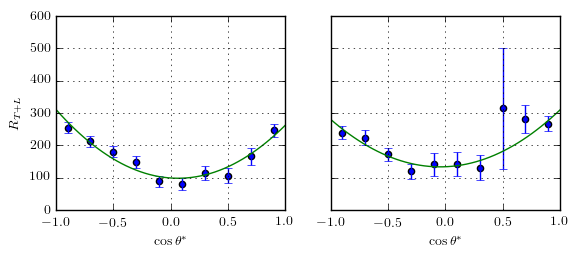

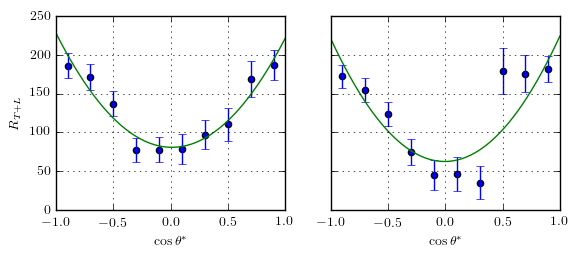

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5), sharey=True)
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.83, 2.015, ax1) #2.043, ax1)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.83, 2.015, ax2) #2.043, ax2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
ax1.set_xlabel(r'$\cos{\theta^*}$')
ax2.set_xlabel(r'$\cos{\theta^*}$')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5), sharey=True)
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.83, 2.344, ax1)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.83, 2.344, ax2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
ax1.set_xlabel(r'$\cos{\theta^*}$')
ax2.set_xlabel(r'$\cos{\theta^*}$')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

In [24]:
df_e1f.Q2.unique()

array([ 2.015,  2.344,  2.69 ,  3.114,  3.588,  4.225,  4.891])

[ 145.17155095   54.27271033   50.78690774]
[  5.49434091   9.58527155  12.39884053]
[ 156.17431593   58.24861923   46.89777962]
[  7.61602309  13.19886003  17.41554594]
*********
[ 48.95163606  -1.3894535   40.30077367]
[ 3.80684121  6.68393947  8.48696291]
[ 41.33901213   3.00001265  37.33052552]
[ 3.26928177  5.79804265  7.01670504]


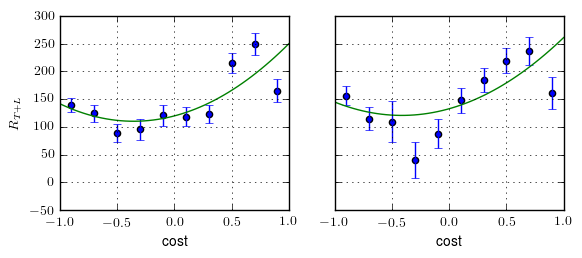

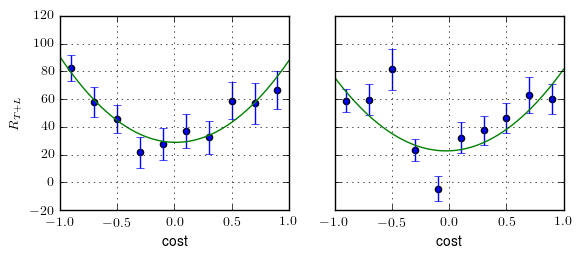

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5), sharey=True)
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.91, 2.015, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.91, 2.015, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)


print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5), sharey=True)
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.91, 3.588, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.91, 3.588, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

[ 14.7571597   14.76650833  25.59698239]
[ 1.57496967  2.92188182  3.83266558]
[ 14.67958136  17.62538655  36.53806987]
[ 1.71688928  2.98122246  4.30988749]
*********
[ 14.91859036  21.20464315  21.85957584]
[ 2.18913771  4.24750196  5.56264931]
[ 13.78135138  13.75001035  27.52114474]
[ 1.71197439  3.3163176   4.26613888]


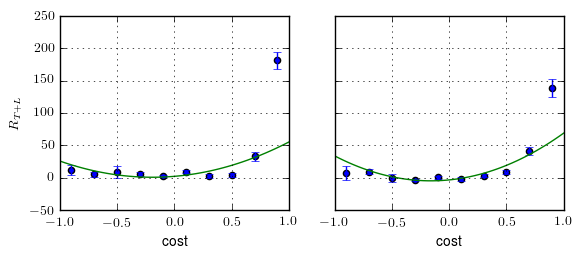

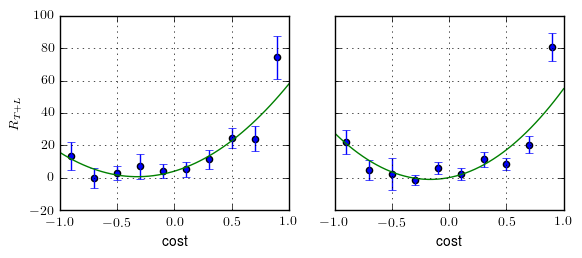

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5), sharey=True)
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.49, 2.015, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.49, 2.015, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5), sharey=True)
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.29, 3.114, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.29, 3.114, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
ax1.set_ylabel(r'$R_{T+L}$')
ax2.set_ylabel('')
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

In [27]:
# t =e1f_xsects_t0[3]
# h = t[-1]
# draw(h)
# e = R.Double(0.0)
# print(h.IntegralAndError(0,-1,0,-1,e,"width"))
# print(e)
# print(t)

38700

In [41]:
print(df_e1f[(df_e1f.W==2.21)&(df_e1f.Q2==2.015)].iloc[0])
df_f[(df_f.W==2.21)&(df_f.Q2==2.015)].iloc[0]

Q2               2.015000
Q2r0             1.850000
Q2r1             2.200000
W                2.210000
Wr0              2.200000
Wr1              2.220000
cost            -0.900000
eps              0.662664
eps_l            0.129800
int_d          655.730300
int_d_err       36.009430
int_f          603.360577
nu               3.207356
x_1_tl        -103.735112
x_1_tl_err      39.488560
x_1_tot        697.486664
x_1_tot_err     37.716243
x_1_tt          56.392393
x_1_tt_err      78.915611
x_tl           -18.437108
x_tl_err         6.188896
x_tot           39.722350
x_tot_err        6.980002
x_tt            -6.883570
x_tt_err        14.191814
xb               0.334777
int_f_err       36.009430
Name: 240, dtype: float64


D0_tot         31.048656
D0_tot_err      1.982757
D1_tot         17.618650
D1_tot_err      3.971204
D2_tot         40.963589
D2_tot_err      6.627770
Q2              2.015000
W               2.210000
eps             0.662664
eps_l           0.129800
nu              3.207356
xb              0.334777
int_f         603.360577
int_f_err      36.009430
int_d         655.730300
int_d_err      36.009430
x_tot         603.360577
x_tot_err      35.748677
x_tt          -25.501337
x_tl         -114.142945
x_tt_err       78.216130
x_tl_err       39.536585
Name: 24, dtype: float64

In [33]:
df_e1f['int_f_err'] = df_e1f['int_d_err']
df_e16['int_f_err'] = df_e16['int_d_err']
df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()
def correct_bg_sub(rec):
    return rec.D0_tot #if rec.W<2 else rec.D0_tot*(1.42857*rec.W-1.85714)
df_f['D0_tot'] = df_f.apply(correct_bg_sub, axis=1)
df_6['D0_tot'] = df_6.apply(correct_bg_sub, axis=1)
# df_f['kfac'] = df_f.W.apply(lambda x: get_kfac(x))
# df_6['kfac'] = df_6.W.apply(lambda x: get_kfac(x))
df_m = pd.read_table('../e1f6/test/xsect_integrated_morand_w_tt_tl.txt')
m = MOMEGA
M = MP
df_f = df_f.merge(df_e1f[['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates(), how='inner', on=['W', 'Q2'])
df_6 = df_6.merge(df_e16[['Q2', 'W', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates(), how='inner', on=['W', 'Q2'])

def qsum(x):
    return np.sqrt(np.sum(np.power(x,2)))
colset = ['Q2', 'W', 'cost', 'x_tot', 'x_tot_err', 'x_tt', 'x_tt_err', 'x_tl', 'x_tl_err']
df = (df_e1f[colset].groupby(['Q2','W']).aggregate({'x_tot':sum, 'x_tot_err':qsum, 'x_tt':sum, 'x_tt_err':qsum, 'x_tl':sum, 'x_tl_err':qsum})*0.2*2*PI).reset_index() #get_kfac(1.93)*0.2*2*PI).reset_index()
df_f = df_f.merge(df, how='left', left_on=['Q2','W'], right_on=['Q2','W'])
df = (df_e16[colset].groupby(['Q2','W']).aggregate({'x_tot':sum, 'x_tot_err':qsum, 'x_tt':sum, 'x_tt_err':qsum, 'x_tl':sum, 'x_tl_err':qsum})*0.2*2*PI).reset_index()
df_6 = df_6.merge(df, how='left', left_on=['Q2','W'], right_on=['Q2','W'])

In [35]:
df_f.head()
df_e1f.head()

,Q2,Q2r0,Q2r1,W,Wr0,Wr1,cost,eps,eps_l,int_d,...,x_1_tt,x_1_tt_err,x_tl,x_tl_err,x_tot,x_tot_err,x_tt,x_tt_err,xb,int_f_err
0,2.015,1.85,2.2,1.73,1.72,1.74,-0.9,0.837221,0.348698,1060.610538,...,79.449735,100.233688,-3.181615,11.481238,73.850880,12.978488,12.159904,22.115904,0.488172,61.003085
1,2.015,1.85,2.2,1.73,1.72,1.74,-0.7,0.837221,0.348698,1060.610538,...,79.449735,100.233688,-13.626304,12.051032,92.413410,14.177599,-7.543119,24.750172,0.488172,61.003085
2,2.015,1.85,2.2,1.73,1.72,1.74,-0.5,0.837221,0.348698,1060.610538,...,79.449735,100.233688,-23.704328,10.824523,79.522092,13.875678,-38.726686,22.706323,0.488172,61.003085
3,2.015,1.85,2.2,1.73,1.72,1.74,-0.3,0.837221,0.348698,1060.610538,...,79.449735,100.233688,-9.311197,12.050083,72.663293,13.474802,49.058967,22.525898,0.488172,61.003085
4,2.015,1.85,2.2,1.73,1.72,1.74,-0.1,0.837221,0.348698,1060.610538,...,79.449735,100.233688,4.709302,9.658297,47.627789,12.051980,-2.358612,20.046432,0.488172,61.003085


In [39]:
df_m[(df_m.Q2>2)&(df_m.Q2<2.3)]

,xb,Q2,W,epsilon,t_0,xsect,error,xtt,xtt_err,xtl,xtl_err
2,0.252,2.042,2.63,0.43,-0.14,421,75,104,47,-18,18
5,0.310,2.050,2.33,0.63,-0.23,551,98,121,42,-66,20
9,0.370,2.050,2.09,0.74,-0.37,1002,180,91,75,-25,39
14,0.429,2.055,1.90,0.81,-0.59,2203,348,54,158,143,85


In [43]:
def combine_xsect(df1, df2, cname_val, cname_err):
    df1_wa = df1.set_index(['W','Q2'], drop=False)
    df1_wa['wval'] = df1_wa[cname_val]/np.power(df1_wa[cname_err],2)
    df2_wa = df2.set_index(['W','Q2'], drop=False)
    df2_wa['wval'] = df2_wa[cname_val]/np.power(df2_wa[cname_err],2)
    avg_v = (df1_wa['wval']+df2_wa['wval'])/(1/np.power(df1_wa[cname_err],2)+1/np.power(df2_wa[cname_err],2))
#     avg_e = np.sqrt(np.power(df1_wa[cname_err],2)+np.power(df2_wa[cname_err],2))
    avg_e = np.sqrt(1/(1/np.power(df1_wa[cname_err],2)+1/np.power(df2_wa[cname_err],2)))
    avg_syserr = np.abs(df1_wa[cname_val]-df2_wa[cname_val])
    df_c = pd.DataFrame({cname_val:avg_v,
                         cname_err:avg_e,
                         '%s_serr'%cname_val:avg_syserr})
    df_c.reset_index(inplace=True)
    df_c.set_index(['W', 'Q2'], drop=False)
    df_c['%s_wserr'%cname_val] = np.sqrt(np.power(df_c[cname_err],2)+np.power(df_c['%s_serr'%cname_val],2))
    df_c = df_c.merge(df1_wa, how='inner', on=['W','Q2'], suffixes=('','_1')).merge(df2_wa, how='inner', on=['W','Q2'], suffixes=('','_2'))
    df_c['%s_syserr_lo'%cname_val] = df_c.apply(lambda x: np.min([x['%s_1'%cname_val],x['%s_2'%cname_val]])-x['%s'%cname_err],axis=1)
    df_c['%s_syserr_hi'%cname_val] = df_c.apply(lambda x: np.max([x['%s_1'%cname_val],x['%s_2'%cname_val]])+x['%s'%cname_err],axis=1)
    return df_c

def combine_xsect_dcost(df1, df2, cname_val, cname_err):
    df1_wa = df1.set_index(['W','Q2', 'cost'], drop=False)
    df1_wa['wval'] = df1_wa[cname_val]/np.power(df1_wa[cname_err],2)
    df2_wa = df2.set_index(['W','Q2', 'cost'], drop=False)
    df2_wa['wval'] = df2_wa[cname_val]/np.power(df2_wa[cname_err],2)
    avg_v = (df1_wa['wval']+df2_wa['wval'])/(1/np.power(df1_wa[cname_err],2)+1/np.power(df2_wa[cname_err],2))
    avg_e = np.sqrt(1/(1/np.power(df1_wa[cname_err],2)+1/np.power(df2_wa[cname_err],2)))
    avg_syserr = np.abs(df1_wa[cname_val]-df2_wa[cname_val])
    df_c = pd.DataFrame({cname_val:avg_v,
                         cname_err:avg_e,
                         '%s_serr'%cname_val:avg_syserr})
    df_c.reset_index(inplace=True)
    df_c.set_index(['W', 'Q2', 'cost'], drop=False)
    df_c['%s_wserr'%cname_val] = np.sqrt(np.power(df_c[cname_err],2)+np.power(df_c['%s_serr'%cname_val],2))
    df_c = df_c.merge(df1_wa, how='inner', on=['W','Q2', 'cost'], suffixes=('','_1')).merge(df2_wa, how='inner', on=['W','Q2', 'cost'], suffixes=('','_2'))
    df_c['%s_syserr_lo'%cname_val] = df_c.apply(lambda x: np.min([x['%s_1'%cname_val],x['%s_2'%cname_val]])-x['%s'%cname_err],axis=1)
    df_c['%s_syserr_hi'%cname_val] = df_c.apply(lambda x: np.max([x['%s_1'%cname_val],x['%s_2'%cname_val]])+x['%s'%cname_err],axis=1)
    return df_c

In [44]:
df_xtot_c = combine_xsect(df_f, df_6, 'int_d', 'int_d_err')
df_xtt_c = combine_xsect(df_f, df_6, 'x_tt', 'x_tt_err')
df_xtl_c = combine_xsect(df_f, df_6, 'x_tl', 'x_tl_err')

In [45]:
# df_xtot_c = combine_xsect(df_f, df_6, 'x_tot', 'x_tot_err')
# df_xtot_c['int_d'] = df_xtot_c.x_tot
# df_xtot_c['int_d_err'] = df_xtot_c.x_tot_err
# df_xtot_c['int_d_syserr_lo'] = df_xtot_c.x_tot_syserr_lo
# df_xtot_c['int_d_syserr_hi'] = df_xtot_c.x_tot_syserr_hi

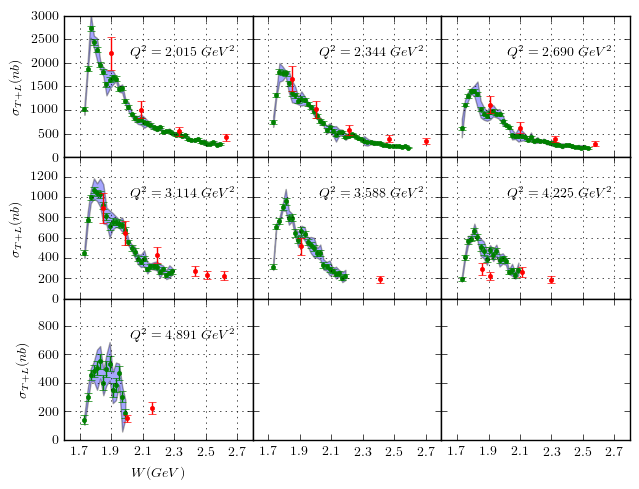

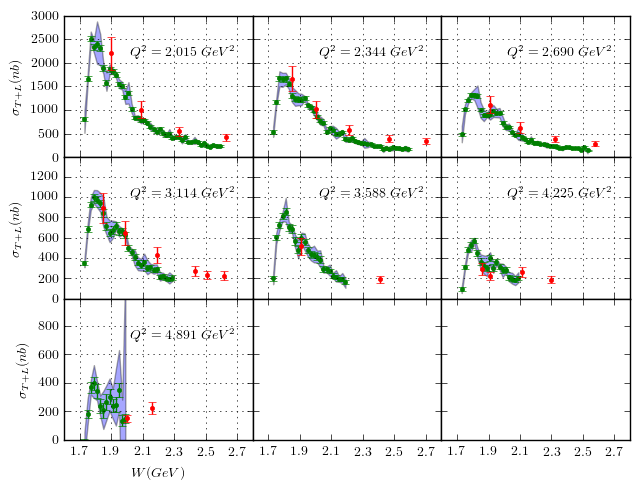

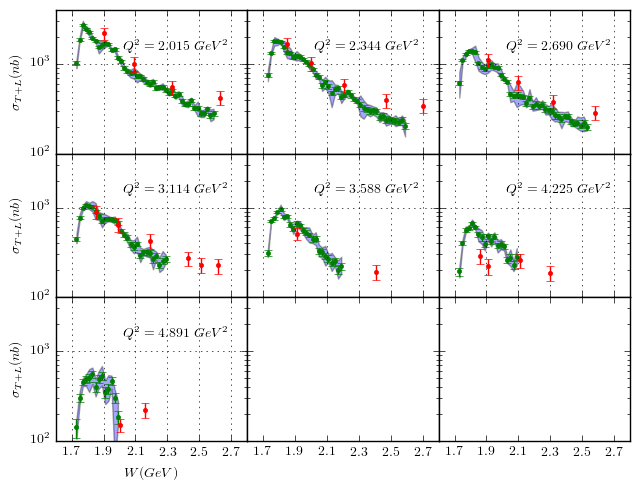

In [46]:
fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True, sharey='row', gridspec_kw={'wspace':0, 'hspace':0})
yhis = [3000,3000,3000,1400,1400,1400,1000,1000,1000]
for iax,(ax,Q2,yhi) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()),yhis)):
    leg_i = 'int_d'
    lbl = r'$\sigma_{T+L} (nb)$'
    df_1q2_6 = df_e16[df_e16.Q2==Q2][['Q2', 'W', 'Q2r0', 'Q2r1', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_1q2 = df_e1f[df_e1f.Q2==Q2][['Q2', 'W', 'Q2r0', 'Q2r1', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_c = df_xtot_c[df_xtot_c.Q2==Q2]
    Q2r0, Q2r1 = df_1q2.Q2r0.values[0], df_1q2.Q2r1.values[0]
#     df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'xsect', 'error']]
    df_1q2_m = df_m[(df_m.Q2>Q2r0)&(df_m.Q2<Q2r1)][['Q2', 'W', 'xsect', 'error']]
#     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
#     ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
#     ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
#     fmts = ['rs', 'bs', 'ms', 'cs']
#     for imQ2, mQ2 in enumerate(df_1q2_m.Q2.unique()):
#         _df = df_1q2_m[df_1q2_m.Q2==mQ2]
#         ax.errorbar(_df.W.values, _df.xsect.values, _df.error.values, fmt=fmts[imQ2], fillstyle='none', zorder=20, label='%.3f'%mQ2)
#         ax.plot(_df.W.values, _df.xsect.values, fmts[imQ2], fillstyle='none', zorder=20)
    ax.errorbar(df_1q2_m.W.values, df_1q2_m.xsect.values, df_1q2_m.error.values, fmt='r.', zorder=20)
    ax.errorbar(df_c.W.values, df_c.int_d.values, df_c.int_d_err.values, fmt='g.')
#     df_c = df_c.merge(df_1q2, how='inner', on=['W','Q2'], suffixes=('_c','_f')).merge(df_1q2_6, how='inner', on=['W','Q2'], suffixes=('','_6'))
#     print(df_c.columns)
    ax.fill_between(df_c.W.values, df_c.int_d_syserr_lo, df_c.int_d_syserr_hi,
#                     df_c.apply(lambda x: np.min([x.int_d_6,x.int_d])-x.x_tot_err,axis=1),
#                     df_c.apply(lambda x: np.max([x.int_d_6,x.int_d])+x.x_tot_err,axis=1),
                    facecolor='blue', alpha=0.35)
#     df_1q2.plot('W', leg_i, kind='scatter', color='b', marker='.', ax=ax)
#     df_1q2_6.plot('W', leg_i, kind='scatter', color='g', marker='.', ax=ax)
    ax.set_ylim(0,yhi-10)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
#     if ax.get_ylim()[1]>5000:
#         ax.set_ylim(5,2000)
    ax.set_xlim(1.6,2.8)
    if iax>5:
        ax.set_xlabel(r'$W (GeV)$')
        ax.set_xticks([1.7,1.9,2.1,2.3,2.5,2.7])
    ax.text(0.35, 0.75, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     ax.set_yscale('log')
#     ax.legend(fontsize='xx-small', numpoints=1)
    plt.tight_layout()

# plt.savefig('int_d_combined.pdf')
fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True, sharey='row', gridspec_kw={'wspace':0, 'hspace':0})
yhis = [3000,3000,3000,1400,1400,1400,1000,1000,1000]
for iax,(ax,Q2,yhi) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()),yhis)):
    leg_i = 'int_d'
    lbl = r'$\sigma_{T+L} (nb)$'
    df_1q2_6 = df_e16[df_e16.Q2==Q2][['Q2', 'W', 'Q2r0', 'Q2r1', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_1q2 = df_e1f[df_e1f.Q2==Q2][['Q2', 'W', 'Q2r0', 'Q2r1', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_xtot_c2 = combine_xsect(df_f, df_6, 'int_f', 'int_d_err')
    df_c = df_xtot_c2[df_xtot_c2.Q2==Q2]
    Q2r0, Q2r1 = df_1q2.Q2r0.values[0], df_1q2.Q2r1.values[0]
#     df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'xsect', 'error']]
    df_1q2_m = df_m[(df_m.Q2>Q2r0)&(df_m.Q2<Q2r1)][['Q2', 'W', 'xsect', 'error']]
#     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
#     ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
#     ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m.xsect.values, df_1q2_m.error.values, fmt='r.', zorder=20)
    ax.errorbar(df_c.W.values, df_c.int_f.values, df_c.int_d_err.values, fmt='g.')
#     df_c = df_c.merge(df_1q2, how='inner', on=['W','Q2'], suffixes=('_c','_f')).merge(df_1q2_6, how='inner', on=['W','Q2'], suffixes=('','_6'))
#     print(df_c.columns)
    ax.fill_between(df_c.W.values, df_c.int_f_syserr_lo, df_c.int_f_syserr_hi,
#                     df_c.apply(lambda x: np.min([x.int_d_6,x.int_d])-x.x_tot_err,axis=1),
#                     df_c.apply(lambda x: np.max([x.int_d_6,x.int_d])+x.x_tot_err,axis=1),
                    facecolor='blue', alpha=0.35)
#     df_1q2.plot('W', leg_i, kind='scatter', color='b', marker='.', ax=ax)
#     df_1q2_6.plot('W', leg_i, kind='scatter', color='g', marker='.', ax=ax)
    ax.set_ylim(0,yhi-10)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
#     if ax.get_ylim()[1]>5000:
#         ax.set_ylim(5,2000)
    ax.set_xlim(1.6,2.8)
    if iax>5:
        ax.set_xlabel(r'$W (GeV)$')
        ax.set_xticks([1.7,1.9,2.1,2.3,2.5,2.7])
    ax.text(0.35, 0.75, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     ax.set_yscale('log')
    plt.tight_layout()


fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True, sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
for iax,(ax,Q2) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()))):
    leg_i = 'int_d'
    lbl = r'$\sigma_{T+L} (nb)$'
    df_1q2_6 = df_e16[df_e16.Q2==Q2][['Q2', 'W', 'Q2r0', 'Q2r1', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_1q2 = df_e1f[df_e1f.Q2==Q2][['Q2', 'W', 'Q2r0', 'Q2r1', 'int_f', 'int_f_err', 'int_d', 'int_d_err']].drop_duplicates()
    df_c = df_xtot_c[df_xtot_c.Q2==Q2]
    Q2r0, Q2r1 = df_1q2.Q2r0.values[0], df_1q2.Q2r1.values[0]
    df_1q2_m = df_m[(df_m.Q2>Q2r0)&(df_m.Q2<Q2r1)][['Q2', 'W', 'xsect', 'error']]
#     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
#     ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
#     ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m.xsect.values, df_1q2_m.error.values, fmt='r.', zorder=20)
    ax.errorbar(df_c.W.values, df_c.int_d.values, df_c.int_d_err.values, fmt='g.')
#     df_c = df_c.merge(df_1q2, how='inner', on=['W','Q2'], suffixes=('_c','_f')).merge(df_1q2_6, how='inner', on=['W','Q2'], suffixes=('','_6'))
#     print(df_c.columns)
    ax.fill_between(df_c.W.values, df_c.int_d_syserr_lo, df_c.int_d_syserr_hi,
#                     df_c.apply(lambda x: np.min([x.int_d_6,x.int_d])-x.x_tot_err,axis=1),
#                     df_c.apply(lambda x: np.max([x.int_d_6,x.int_d])+x.x_tot_err,axis=1),
                    facecolor='blue', alpha=0.35)
#     df_1q2.plot('W', leg_i, kind='scatter', color='b', marker='.', ax=ax)
#     df_1q2_6.plot('W', leg_i, kind='scatter', color='g', marker='.', ax=ax)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
#     ax.set_ylim(5)
#     if ax.get_ylim()[1]>5000:
#         ax.set_ylim(5,2000)
    ax.set_xlim(1.6,2.8)
    if iax>5:
        ax.set_xlabel(r'$W (GeV)$')
        ax.set_xticks([1.7,1.9,2.1,2.3,2.5,2.7])
    ax.text(0.35, 0.75, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_yscale('log')
    ax.set_ylim(ax.get_ylim()[0],4000)
    plt.tight_layout()

# plt.savefig('int_d_combined_logy.pdf')

In [44]:
df_e1f.columns

Index(['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'Wr0', 'Wr1', 'Q2r0', 'Q2r1',
       'cost', 'int_f', 'int_d', 'int_d_err', 'x_tot', 'x_tot_err', 'x_tl',
       'x_tl_err', 'x_tt', 'x_tt_err', 'int_f_err'],
      dtype='object')

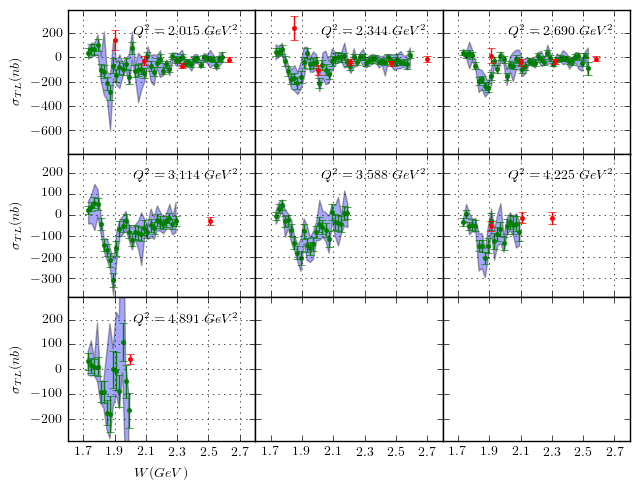

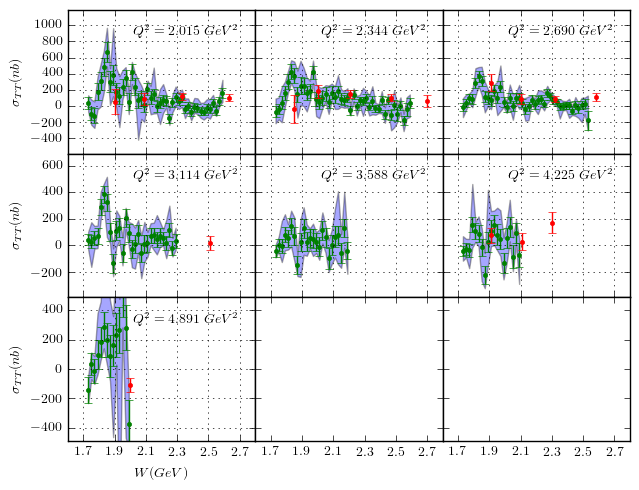

In [47]:
fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True, sharey='row', gridspec_kw={'wspace':0, 'hspace':0})
ylims = [(-800,400), (-800,400), (-800,400),
         (-400,300), (-400,300), (-400,300),
         (-300,300), (-300,300), (-300,300)]
for iax,(ax,Q2,ylim) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()),ylims)):
    lbl = r'$\sigma_{TL} (nb)$'
    df_1q2 = df_f[df_f.Q2==Q2][['Q2', 'W', 'x_tl', 'x_tl_err']]
    df_1q2_6 = df_6[df_6.Q2==Q2][['Q2', 'W', 'x_tl', 'x_tl_err']]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'xtl', 'xtl_err']]
    df_c = df_xtl_c[df_xtl_c.Q2==Q2]
#     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
#     ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
#     ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m.xtl.values, df_1q2_m.xtl_err.values, fmt='r.', zorder=20)
    ax.errorbar(df_c.W.values, df_c.x_tl.values, df_c.x_tl_err.values, fmt='g.')
#     df_c = df_c.merge(df_1q2, how='inner', on=['W','Q2'], suffixes=('_c','_f')).merge(df_1q2_6, how='inner', on=['W','Q2'], suffixes=('','_6'))
#     print(df_c.columns)
    ax.fill_between(df_c.W.values, df_c.x_tl_syserr_lo, df_c.x_tl_syserr_hi,
#                     df_c.apply(lambda x: np.min([x.int_d_6,x.int_d])-x.x_tot_err,axis=1),
#                     df_c.apply(lambda x: np.max([x.int_d_6,x.int_d])+x.x_tot_err,axis=1),
                    facecolor='blue', alpha=0.35)
#     df_1q2.plot('W', leg_i, kind='scatter', color='b', marker='.', ax=ax)
#     df_1q2_6.plot('W', leg_i, kind='scatter', color='g', marker='.', ax=ax)
    ylim = (ylim[0]+10, ylim[1]-10)
    ax.set_ylim(*ylim)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
    ax.set_xlim(1.6,2.8)
    if iax>5:
        ax.set_xlabel(r'$W (GeV)$')
        ax.set_xticks([1.7,1.9,2.1,2.3,2.5,2.7])
    ax.text(0.35, 0.85, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     ax.set_yscale('log')
    plt.tight_layout()

# plt.savefig('int_xtl_combined.pdf')

fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True, sharey='row', gridspec_kw={'wspace':0, 'hspace':0})
ylims = [(-600,1200), (-600,1200), (-600,1200),
         (-400,700), (-400,700), (-400,700),
         (-500,500), (-500,500), (-500,500)]
for iax,(ax,Q2,ylim) in enumerate(zip(fig.get_axes(), sorted(df_6.Q2.unique()),ylims)):
    lbl = r'$\sigma_{TT} (nb)$'
    df_1q2 = df_f[df_f.Q2==Q2][['Q2', 'W', 'x_tt', 'x_tt_err']]
    df_1q2_6 = df_6[df_6.Q2==Q2][['Q2', 'W', 'x_tt', 'x_tt_err']]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'xtt', 'xtt_err']]
    df_c = df_xtt_c[df_xtt_c.Q2==Q2]
#     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
#     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
#     ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
#     ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    ax.errorbar(df_1q2_m.W.values, df_1q2_m.xtt.values, df_1q2_m.xtt_err.values, fmt='r.', zorder=20)
    ax.errorbar(df_c.W.values, df_c.x_tt.values, df_c.x_tt_err.values, fmt='g.')
#     df_c = df_c.merge(df_1q2, how='inner', on=['W','Q2'], suffixes=('_c','_f')).merge(df_1q2_6, how='inner', on=['W','Q2'], suffixes=('','_6'))
#     print(df_c.columns)
    ax.fill_between(df_c.W.values, df_c.x_tt_syserr_lo, df_c.x_tt_syserr_hi,
#                     df_c.apply(lambda x: np.min([x.int_d_6,x.int_d])-x.x_tot_err,axis=1),
#                     df_c.apply(lambda x: np.max([x.int_d_6,x.int_d])+x.x_tot_err,axis=1),
                    facecolor='blue', alpha=0.35)
#     df_1q2.plot('W', leg_i, kind='scatter', color='b', marker='.', ax=ax)
#     df_1q2_6.plot('W', leg_i, kind='scatter', color='g', marker='.', ax=ax)
    ylim = (ylim[0]+10, ylim[1]-10)
    ax.set_ylim(*ylim)
    if iax%3==0:
        ax.set_ylabel(lbl)
    else:
        ax.set_ylabel('')
    ax.grid()
    ax.set_xlim(1.6,2.8)
    if iax>5:
        ax.set_xlabel(r'$W (GeV)$')
        ax.set_xticks([1.7,1.9,2.1,2.3,2.5,2.7])
    ax.text(0.35, 0.85, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     ax.set_yscale('log')
    plt.tight_layout()

# plt.savefig('int_xtt_combined.pdf')


In [31]:
# df_e1f_tot_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR2e, 'x_tot') for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
# df_e16_tot_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR2e, 'x_tot') for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])

In [46]:
def get_d_legs(legs):
    lms = legs

    def d_legs(v, par):
        retval = reduce(lambda x, y: x + y, [par[i] * R.Math.assoc_legendre(
            L, M, v[0]) for i, (L, M) in enumerate(lms)])
        return retval
    return d_legs


def get_f_legs(legs, par):
    retf = R.TF1('flegs', get_d_legs(legs), -1, 1, len(legs))
    for i in range(0, len(legs)):
        retf.SetParameter(i, par[i])
    return retf


def get_d_legs_tu(legs):
    lms = legs
    iexp0 = [i+len(legs) for i in range(0, 4)]

    def d_legs_tu(v, par):
        retval = reduce(lambda x, y: x + y, [par[i] * R.Math.assoc_legendre(
            L, M, v[0]) for i, (L, M) in enumerate(lms)])
        retval = retval + par[iexp0[0]] * R.TMath.Exp(par[iexp0[1]] * v[0])
        retval = retval + par[iexp0[2]] * R.TMath.Exp(-par[iexp0[3]] * v[0])
        return retval
    return d_legs_tu


def get_f_legs_tu(order=7, ignore=[], tamp=200, uamp=200):
    nlegs = order - len(ignore) + 1
    npars = nlegs + 4  # legendre 0...leg_order plus 4 for the 2 expos
    legs = [(i, 0) for i in range(0, order+1) if (i, 0) not in ignore]
    retf = R.TF1('flegstu', get_d_legs_tu(legs), -1, 1, npars)
    if tamp == 0:
        retf.FixParameter(nlegs+0, tamp)
        retf.FixParameter(nlegs+1, 0)
    else:
        retf.SetParLimits(nlegs+0, 0, tamp)
        retf.SetParLimits(nlegs+1, 5, 40)
        retf.SetParameter(nlegs+0, 0)
#         retf.SetParameter(nlegs+1, 7.3)
        retf.FixParameter(nlegs+1, 12)
    if uamp == 0:
        retf.FixParameter(nlegs+2, uamp)
        retf.FixParameter(nlegs+3, 0)
    else:
        retf.SetParLimits(nlegs+2, 0, uamp)
        retf.SetParLimits(nlegs+3, 1, 50)
    # for ipar in range(0, nlegs):
    #     retf.SetParLimits(ipar, 0, 1000)
    #     retf.SetParName(ipar, 'L_%d_%d' % legs[ipar])
    retf.SetParLimits(0, 0, 1000)
    for ipar in range(1, nlegs):
        retf.SetParLimits(1, -1000, 1000)
    retf.legs = legs
    return retf


def fitlegs(h, leg_order=3, ignore=[], tamp=0, uamp=0, trim=False):
    f = get_f_legs_tu(leg_order, ignore, tamp, uamp)
    p0, p1 = R.Double(-1), R.Double(-1)
    # for ipar in range(0, f.GetNpar()):
    #     f.GetParLimits(ipar, p0, p1)
    #     print(ipar, p0, p1)
    # h.SetMinimum(1)
    (rlo, rhi) = (-0.875, 0.875) if trim else (-1, 1)

    #correction for drop in thrown event yield at forward angle
    #lastbc = h.GetBinContent(h.GetNbinsX())
    #if lastbc > 0: h.SetBinContent(h.GetNbinsX(), 1.15*lastbc)
    
    if tamp>0:
        ftmp = get_f_legs_tu(leg_order, ignore, tamp=0, uamp=0)
        h.Fit(ftmp, 'QN0', 'goff', -0.85,0.75)
        for iparm in range(leg_order):
            pest = ftmp.GetParameter(iparm)
            dpest = pest*0.2
            dpest = -1*dpest if dpest<0 else dpest
            if iparm==0:
                f.SetParLimits(iparm, 0, pest+dpest)
            else:
#                 f.SetParLimits(iparm, pest-dpest, pest+dpest)
                f.FixParameter(iparm, pest)
    h.Fit(f, 'QN0', 'goff', rlo, rhi)
    f.SetRange(-1,1)
    h.GetListOfFunctions().Add(f)
    status = gMin.fCstatu
    fl = get_f_legs(f.legs, f.GetParameters())
    fl.SetLineColor(R.kBlue+1)
    fl.SetLineStyle(2)
    fl.SetLineWidth(3)
    #fl.Draw("same")
    h.GetListOfFunctions().Add(fl)

    ft = R.TF1('ft', '[0]*TMath::Exp([1]*x)', -1, 1)
    ft.SetParameters(f.GetParameter(len(f.legs)), f.GetParameter(len(f.legs)+1))
    ft.SetLineColor(R.kGreen+1)
    ft.SetLineStyle(2)
    #ft.Draw('same')
    h.GetListOfFunctions().Add(ft)

    fu = None
    if uamp > 0:
        fu = R.TF1('fu', '[0]*TMath::Exp(-[1]*x)', -1, 1)
        fu.SetParameters(f.GetParameter(len(f.legs)+2), f.GetParameter(len(f.legs)+3))
        fu.SetLineColor(R.kYellow+1)
        fu.SetLineStyle(2)
        #fu.Draw('same')
    return (f, fl, ft, fu, h, status)

In [47]:
def get_hcost(df, W, Q2):
    h = R.TH1D('hcost', 'hcost', 10, -1, 1)
    df_1bin = df[(df.W==W)&(df.Q2==Q2)][['cost','x_tot','x_tot_err']]
    for (cost, val, err) in zip(df_1bin.cost.values, df_1bin.x_tot.values, df_1bin.x_tot_err.values):
        xbin = h.FindBin(cost)
        h.SetBinContent(xbin, val)
        h.SetBinError(xbin, err)
    return h

def get_df_legs_ta(df):
    Ws, Q2s, d0s, d1s, d2s, tAs, statuses, magLegs, magExps, mags, errs = [], [], [], [], [], [], [], [], [], [], []

    for W,Q2 in df[['W','Q2']].drop_duplicates().values:
        h = get_hcost(df, W, Q2)
        f, fl, ft, fu, h, status = fitlegs(h, 2, tamp=1)
        int_d = df[(df.W==W)&(df.Q2==Q2)].int_d.unique()[0]
        int_d_err = df[(df.W==W)&(df.Q2==Q2)].int_d_err.unique()[0]
        Ws.append(W)
        Q2s.append(Q2)
        d0s.append(f.GetParameter(0))
        d1s.append(f.GetParameter(1))
        d2s.append(f.GetParameter(2))
        tAs.append(f.GetParameter(3))
        magLegs.append(fl.Integral(-1,1)/f.Integral(-1,1))
        magExps.append(ft.Integral(-1,1)/f.Integral(-1,1))
        mags.append(f.Integral(-1,1))
        errs.append(int_d_err/int_d)
        statuses.append(status)
        h.Delete()
        del h

    df_legs_ta = pd.DataFrame(list(zip(*[Ws, Q2s, d0s, d1s, d2s, tAs, magLegs, magExps, mags, errs, statuses])), columns=['W', 'Q2', 'D0', 'D1', 'D2', 'tA', 'magLegs', 'magExps', 'mags', 'errs', 'status'])
    return df_legs_ta

In [48]:
df = combine_xsect_dcost(df_e1f, df_e16, 'x_tot', 'x_tot_err')
df_legs_ta_6 = get_df_legs_ta(df_e16)
df_legs_ta_f = get_df_legs_ta(df_e1f)
df_legs_ta_c = get_df_legs_ta(df)
for df in [df_legs_ta_6, df_legs_ta_f]:
    df['mags_errs'] = df.errs*df.mags
    df['magExps_errs'] = df.magExps*df.errs
    df['magLegs_errs'] = df.magLegs*df.errs

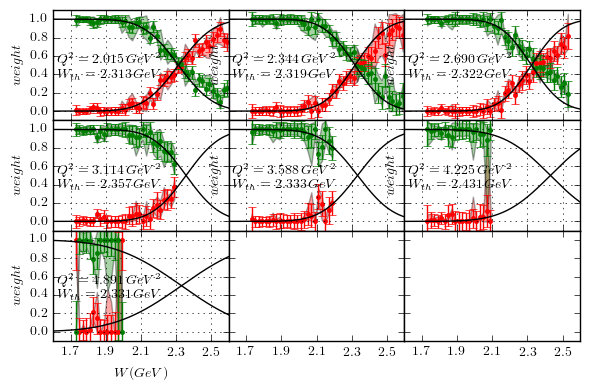

In [54]:
import scipy
def ferf(x, a, b):
    return scipy.special.erfc(a*(x-b))/2.0
# def ferf(x, a):
#     return scipy.special.erfc(a*x-10)/2.0
fig, axes = None, None
for df_legs_ta in [df_legs_ta_c]: #[df_legs_ta_6, df_legs_ta_f, df_legs_ta_c, df_legs_ta_6f_c]:
    fig, axes = plt.subplots(3,3, sharex=True, sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
    bnds = [[0,2.2],[10,2.4]]
    for ax, Q2 in zip(fig.get_axes(),df_legs_ta.Q2.unique()):
        df = df_legs_ta[df_legs_ta.Q2==Q2]
        ax.errorbar(df.W.values, df.magExps.values, df.errs.values, fmt='r.')
        ax.errorbar(df.W.values, df.magLegs.values, df.errs.values, fmt='g.')
        df = df[df.W<2.3] #df[0:-1]
        parms, pcov = so.curve_fit(ferf, df.W.values, df.magLegs.values, sigma=df.errs.values, bounds=bnds)
        parm_errs = np.sqrt(np.diag(pcov))
        bnds[0][0] = parms[0]-1
        bnds[1][0] = parms[0]+1
        bnds[0][1] = parms[1]-0.1
        bnds[1][1] = parms[1]+0.3
        X = np.arange(1.6, 2.6, 0.001)
        Y = list([ferf(x, *parms) for x in X])
        ax.plot(X, Y, 'k-', zorder=20)
        ax.plot(X, [1-y for y in Y], 'k-', zorder=20)
        ax.set_yticks([y for y in np.arange(0,1.1,0.2)])
        ax.set_xticks([w for w in np.arange(1.7,2.6,0.2)])
        ax.grid()
        ax.text(0.02, 0.55, r'$Q^2 = %.3f\,GeV^2$'%Q2,
                fontsize=10, fontweight='bold',
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
    #     for x,y in zip(X,Y):
    #         if y<0.9:
    #             ax.text(0.02, 0.4, r'$W_{th} = %.3f\,GeV$'%x,
    #                     fontsize=10, fontweight='bold',
    #                     horizontalalignment='left',
    #                     verticalalignment='center',
    #                     transform=ax.transAxes)
    #             break
        ax.text(0.02, 0.4, r'$W_{th} = %.3f\,GeV$'%parms[1],
                fontsize=10, fontweight='bold',
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.set_xlabel(r'$W (GeV)$')
        ax.set_ylabel(r'$weight$')
        ax.set_ylim(-0.1,1.1)
#     print(parms)
#     print(parm_errs)
    plt.tight_layout()

# fig, axes = plt.subplots(3,3, sharex=True, sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
for ax, Q2 in zip(fig.get_axes(),df_legs_ta_c.Q2.unique()):
    df1 = df_legs_ta_6[df_legs_ta_6.Q2==Q2]
    df2 = df_legs_ta_f[df_legs_ta_f.Q2==Q2]
    df = combine_xsect(df1, df2, 'magExps', 'magExps_errs')
    ax.fill_between(df.W.values, df.magExps_syserr_lo, df.magExps_syserr_hi,
                    facecolor='red', alpha=0.35)
    df = combine_xsect(df1, df2, 'magLegs', 'magLegs_errs')
    ax.fill_between(df.W.values, df.magLegs_syserr_lo, df.magLegs_syserr_hi,
                    facecolor='green', alpha=0.35)
plt.tight_layout()

In [59]:
# TODO add parm errors to dataframe and plot each and combined for each Q2
# fig, axes = plt.subplots(9,4, sharex=True, sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
# for Q2 in df_legs_ta_c.Q2.unique():
#     for vstr in ['D0', 'D1', 'D2', 'tA']:
df_legs_ta_f.columns

Index(['W', 'Q2', 'D0', 'D1', 'D2', 'tA', 'magLegs', 'magExps', 'mags', 'errs',
       'status', 'mags_errs', 'magExps_errs', 'magLegs_errs'],
      dtype='object')

In [61]:
import scipy
def ferf(x, a, b):
    return scipy.special.erfc(a*(x-b))/2.0
# def ferf(x, a):
#     return scipy.special.erfc(a*x-10)/2.0
for df in [df_legs_ta_6, df_legs_ta_f]:
    df['magExps_errs'] = df.errs*df.magExps
df_legs_ta_6f_c = combine_xsect_dcost(df_legs_ta_6, df_legs_ta_f, 'magExps', 'magExps_errs')
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
bnds = [[0,2.2],[10,2.4]]
for ax, Q2 in zip(fig.get_axes(),df_legs_ta.Q2_6f_c.unique()):
    df = df_legs_ta_6f_c[df_legs_ta_6f_c.Q2==Q2]
#         ax.errorbar(df.W.values, df.magExps.values, df.errs.values, fmt='r.')
#         ax.errorbar(df.W.values, df.magLegs.values, df.errs.values, fmt='g.')
    df = df[df.W<2.3] #df[0:-1]
    parms, pcov = so.curve_fit(ferf, df.W.values, df.magLegs.values, sigma=df.errs.values, bounds=bnds)
    parm_errs = np.sqrt(np.diag(pcov))
    bnds[0][0] = parms[0]-1
    bnds[1][0] = parms[0]+1
    bnds[0][1] = parms[1]-0.1
    bnds[1][1] = parms[1]+0.3
    X = np.arange(1.6, 2.6, 0.001)
    Y = list([ferf(x, *parms) for x in X])
    ax.plot(X, Y, 'g%s'%fmt)
    ax.plot(X, [1-y for y in Y], 'r%s'%fmt)
    ax.set_yticks([y for y in np.arange(0,1.1,0.2)])
    ax.set_xticks([w for w in np.arange(1.9,2.55,0.3)])
    ax.grid()
    ax.text(0.02, 0.55, r'$Q^2 = %.3f\,GeV^2$'%Q2,
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
#     for x,y in zip(X,Y):
#         if y<0.9:
#             ax.text(0.02, 0.4, r'$W_{th} = %.3f\,GeV$'%x,
#                     fontsize=10, fontweight='bold',
#                     horizontalalignment='left',
#                     verticalalignment='center',
#                     transform=ax.transAxes)
#             break
#         ax.text(0.02, 0.4, r'$W_{th} = %.3f\,GeV$'%parms[1],
#                 fontsize=10, fontweight='bold',
#                 horizontalalignment='left',
#                 verticalalignment='center',
#                 transform=ax.transAxes)
#     print(parms)
#     print(parm_errs)
plt.tight_layout()

KeyError: 'cost'

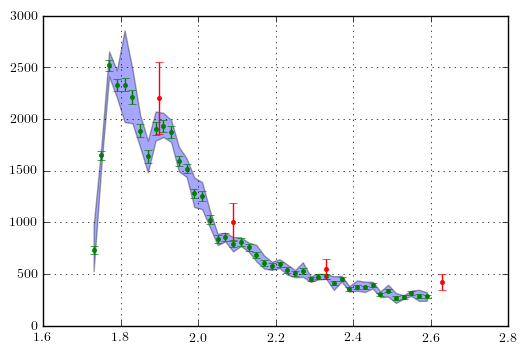

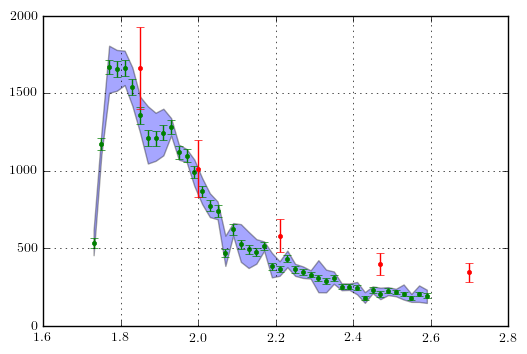

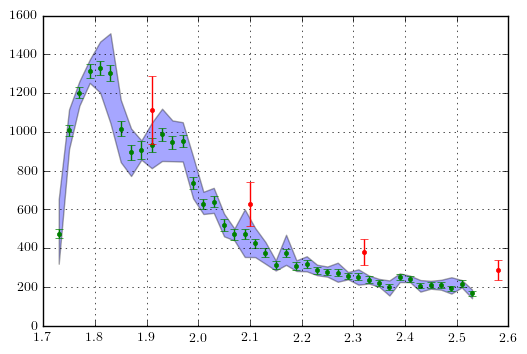

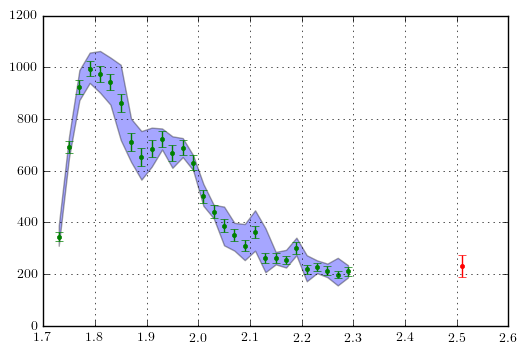

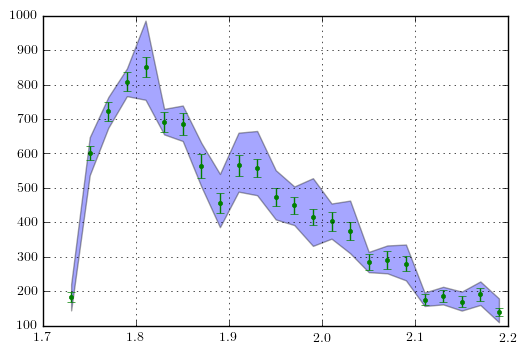

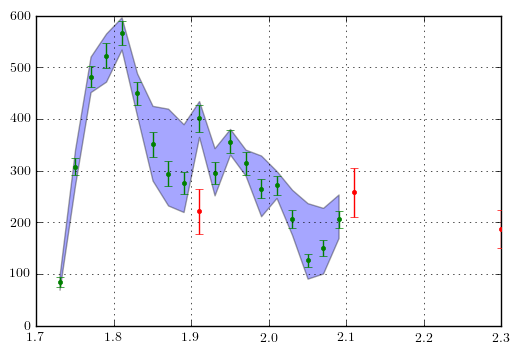

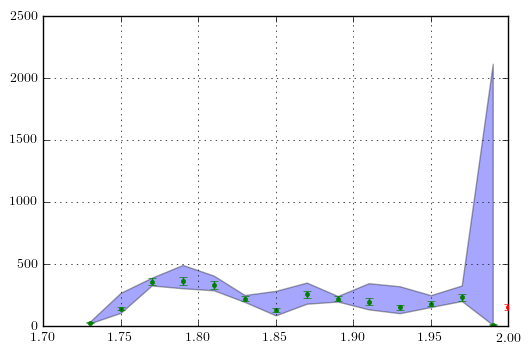

In [60]:
for Q2 in df_legs_ta_c.Q2.unique():
    for df in [df_legs_ta_6, df_legs_ta_f]:
        df['mags_errs'] = df.errs*df.mags
    df_legs_ta_6f_c = combine_xsect(df_legs_ta_6, df_legs_ta_f, 'mags', 'mags_errs')
    df = df_legs_ta_6f_c[df_legs_ta_6f_c.Q2==Q2]
    plt.errorbar(df.W.values, (df.mags*2*math.pi).values, (df.mags_errs*2*math.pi).values, fmt='g.')
    plt.fill_between(df.W.values, df.mags_syserr_lo*2*math.pi, df.mags_syserr_hi*2*math.pi,
                    facecolor='blue', alpha=0.35)
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.1))&(df_m.Q2<(Q2+0.2))][['Q2', 'W', 'xsect', 'error']]
    #     ax.plot(df_1q2.W, df_1q2[leg_i]*e1fscale, 'b.')
    #     ax.plot(df_1q2_6.W, df_1q2_6[leg_i], 'g.')
    #     ax.errorbar(df_1q2.W.values, (df_1q2[leg_i]*e1fscale).values, (df_1q2['%s_err'%leg_i]*e1fscale).values, fmt='b.')
    #     ax.errorbar(df_1q2_6.W.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
    plt.errorbar(df_1q2_m.W.values, df_1q2_m.xsect.values, df_1q2_m.error.values, fmt='r.', zorder=20)
    plt.grid()
#     plt.vlines(1.91, 0, plt.ylim()[1])
    plt.show()

In [ ]:
print(status)
for iparm in range(f.GetNpar()):
    pval = f.GetParameter(iparm)
    print(pval)
fig = draw(asrootpy(h))
X,Y = zip(*get_points_from_TF1(f, -1, 1))
plt.plot(X,Y)
plt.show()

In [ ]:
df_e1f.head()

In [ ]:
for leg_i,lbl in zip(['x_tt', 'x_tl'],[r'$\frac{d^2\sigma_{TT}}{d\Omega^*} (nb/sr)$', r'$\frac{d^2\sigma_{TL}}{d\Omega^*} (nb/sr)$']):
    fig, axes = plt.subplots(3,3, figsize=(6.5,5), sharex=True)
    for iax,(ax,W) in enumerate(zip(fig.get_axes(), [1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.91, 1.93])):
        Q2 = 2.043
#         leg_i = 'x_tt'
#         lbl = r'$R_{TT} (nb/sr)$'
        df_1q2 = df_e1f[(df_e1f.Q2==Q2)&(df_e1f.W==W)][['Q2', 'W', 'int_f', 'int_f_err', 'cost', 'x_tot', 'x_tot_err', 'x_tt', 'x_tt_err', 'x_tl', 'x_tl_err']]
        df_1q2_6 = df_e16[(df_e16.Q2==Q2)&(df_e1f.W==W)][['Q2', 'W', 'int_f', 'int_f_err', 'cost', 'x_tot', 'x_tot_err', 'x_tt', 'x_tt_err', 'x_tl', 'x_tl_err']]
        df_c = combine_xsect_dcost(df_1q2, df_1q2_6, leg_i, '%s_err'%leg_i)
#         ax.errorbar(df_1q2.cost.values, df_1q2[leg_i].values, df_1q2['%s_err'%leg_i].values, fmt='b.')
#         ax.errorbar(df_1q2_6.cost.values, df_1q2_6[leg_i].values, df_1q2_6['%s_err'%leg_i].values, fmt='g.')
        ax.errorbar(df_c.cost.values, df_c[leg_i].values, df_c['%s_err'%leg_i].values, fmt='k.')
        if iax%3==0:
            ax.set_ylabel(lbl)
        else:
            ax.set_ylabel('')
        ax.grid()
        ax.set_ylim(-200,200)
        ax.set_xlim(-1,1)
        ax.set_xlabel(r'$\cos{\theta}$')
        ax.text(0.25, 0.9, r'$W = %.3f\ GeV$'%W,
                fontsize=10,
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
    #     ax.set_yscale('log')
        plt.tight_layout()
#         print(df_1q2[leg_i].sum())

In [ ]:
df_e1f_tl_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR3, 'x_tl') for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
df_e16_tl_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR3, 'x_tl') for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])
df_e1f_tt_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR3, 'x_tt') for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
df_e16_tt_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR3, 'x_tt') for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])
df_xtt_cost_c = combine_xsect_dcost(df_e1f, df_e16, 'x_tt', 'x_tt_err')
df_c_tt_legs = pd.DataFrame([get_legs_dict(df_xtt_cost_c, w, q2, legR3, 'x_tt') for q2 in df_xtt_cost_c.Q2.unique() for w in df_xtt_cost_c.W.unique()])
df_xtl_cost_c = combine_xsect_dcost(df_e1f, df_e16, 'x_tl', 'x_tl_err')
df_c_tl_legs = pd.DataFrame([get_legs_dict(df_xtl_cost_c, w, q2, legR3, 'x_tl') for q2 in df_xtl_cost_c.Q2.unique() for w in df_xtl_cost_c.W.unique()])

In [ ]:
for Q2 in sorted(df_c_tl_legs.Q2.dropna().unique()):
    fig, axes = plt.subplots(1,4, figsize=(8,2))
    df_1q2 = df_c_tl_legs[df_c_tl_legs.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot', 'D3_tot'], [r'$D_0: R_{TL} (nb/sr)$', r'$D_1: R_{TL} (nb/sr)$', r'$D_2: R_{TL} (nb/sr)$', r'$D_3: R_{TL} (nb/sr)$']):
#         if leg_i=='D0_tot':
#             df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
#             df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', zorder=20, ax=ax)
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='g', ax=ax)
    
#         ax.fill_between(df_1q2.W.values, df_1q2.x_tl_syserr_lo, df_1q2.x_tl_syserr_hi,
#                         facecolor='blue', alpha=0.35)
#         df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='g', ax=ax)
        ax.set_ylabel(lbl)
#         ytlocs, ytlbls = plt.yticks()
#         print([ylbl.get_text() for ylbl in ytlbls])
#         ylbls = ['%1.f'%(float(ylbl.get_text())/100) for ylbl in ytlbls]
#         plt.yticks(ytlocs, ylbls)
        ax.set_xlim(1.6,2.8)
#         ax.set_ylim(-400,400)
        ax.set_xlabel(r'$W (GeV)$')
        ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
                fontsize=10,
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.grid()
        plt.tight_layout()

In [ ]:
for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,4, figsize=(8,2))
    df_1q2 = df_e16_tl_legs[df_e16_tl_legs.Q2==Q2]
    df_1q2_f = df_e1f_tl_legs[df_e1f_tl_legs.Q2==Q2]
    df_1q2_c = df_c_tl_legs[df_c_tl_legs.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot', 'D3_tot'], [r'$D_0: R_{TL} (nb/sr)$', r'$D_1: R_{TL} (nb/sr)$', r'$D_2: R_{TL} (nb/sr)$', r'$D_3: R_{TL} (nb/sr)$']):
#         if leg_i=='D0_tot':
#             df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
#             df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', zorder=20, ax=ax)
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='b', ax=ax)
        df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='g', ax=ax)
        if len(df_1q2_c)>0:
            df_1q2_c.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='k', ax=ax)
        ax.set_ylabel(lbl)
#         ytlocs, ytlbls = plt.yticks()
#         print([ylbl.get_text() for ylbl in ytlbls])
#         ylbls = ['%1.f'%(float(ylbl.get_text())/100) for ylbl in ytlbls]
#         plt.yticks(ytlocs, ylbls)
        ax.set_xlim(1.6,2.8)
#         ax.set_ylim(-400,400)
        ax.set_xlabel(r'$W (GeV)$')
        ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
                fontsize=10,
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.grid()
        plt.tight_layout()

In [ ]:
w = 2.21
for Q2 in df_e1f.Q2.unique():
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(6.5,1.5), sharey=True)
    if len(df_e1f[(df_e1f.Q2==Q2)&(df_e1f.W==w)])>0:
        leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, w, Q2, ax1, fitfunc=legR3, sfunc='x_tt')
    if len(df_e16[(df_e16.Q2==Q2)&(df_e16.W==w)])>0:
        leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, w, Q2, ax2, fitfunc=legR3, sfunc='x_tt')
    if len(df_xtt_cost_c[(df_xtt_cost_c.Q2==Q2)&(df_xtt_cost_c.W==w)])>0:
        leg_parms_c_1wq2bin = plots_1wq2bin(df_xtt_cost_c, w, Q2, ax3, fitfunc=legR3, sfunc='x_tt')
    ax1.set_xlim(-1,1)
    ax2.set_xlim(-1,1)
    ax3.set_xlim(-1,1)
    ax1.set_ylabel(r'$R_{TT}$')
    ax2.set_ylabel('')
    ax3.set_ylabel('')
    ax1.set_xlabel(r'$\cos{\theta^*}$')
    ax2.set_xlabel(r'$\cos{\theta^*}$')
    ax3.set_xlabel(r'$\cos{\theta^*}$')
#     for res in leg_parms_e1f_1wq2bin:
#         print(res)
#     for res in leg_parms_e16_1wq2bin:
#         print(res)

#     print('*********')

for Q2 in df_e1f.Q2.unique():
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(6.5,1.5), sharey=True)
    if len(df_e1f[(df_e1f.Q2==Q2)&(df_e1f.W==w)])>0:
        leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, w, Q2, ax1, fitfunc=legR3, sfunc='x_tl')
    if len(df_e16[(df_e16.Q2==Q2)&(df_e16.W==w)])>0:
        leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, w, Q2, ax2, fitfunc=legR3, sfunc='x_tl')    
    if len(df_xtl_cost_c[(df_xtl_cost_c.Q2==Q2)&(df_xtl_cost_c.W==w)])>0:
        leg_parms_c_1wq2bin = plots_1wq2bin(df_xtl_cost_c, w, Q2, ax3, fitfunc=legR3, sfunc='x_tl')
    ax1.set_xlim(-1,1)
    ax2.set_xlim(-1,1)
    ax3.set_xlim(-1,1)
    ax1.set_ylabel(r'$R_{TL}$')
    ax2.set_ylabel('')
    ax3.set_ylabel('')
    ax1.set_xlabel(r'$\cos{\theta^*}$')
    ax2.set_xlabel(r'$\cos{\theta^*}$')
    ax3.set_xlabel(r'$\cos{\theta^*}$')
#     for res in leg_parms_e1f_1wq2bin:
#         print(res)
#     for res in leg_parms_e16_1wq2bin:
#         print(res)
#     print('*********')

In [ ]:
for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,4, figsize=(8,2))
    df_1q2 = df_e16_tl_legs[df_e16_tl_legs.Q2==Q2]
    df_1q2_f = df_e1f_tl_legs[df_e1f_tl_legs.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot', 'D3_tot'], [r'$D_0: R_{TL} (nb/sr)$', r'$D_1: R_{TL} (nb/sr)$', r'$D_2: R_{TL} (nb/sr)$', r'$D_3: R_{TL} (nb/sr)$']):
#         if leg_i=='D0_tot':
#             df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
#             df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', zorder=20, ax=ax)
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='b', ax=ax)
        df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='g', ax=ax)
        ax.set_ylabel(lbl)
#         ytlocs, ytlbls = plt.yticks()
#         print([ylbl.get_text() for ylbl in ytlbls])
#         ylbls = ['%1.f'%(float(ylbl.get_text())/100) for ylbl in ytlbls]
#         plt.yticks(ytlocs, ylbls)
        ax.set_xlim(1.6,2.8)
#         ax.set_ylim(-400,400)
        ax.set_xlabel(r'$W (GeV)$')
        ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
                fontsize=10,
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.grid()
        plt.tight_layout()

In [ ]:
for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,4, figsize=(8,2))
    df_1q2 = df_e16_tt_legs[df_e16_tt_legs.Q2==Q2]
    df_1q2_f = df_e1f_tt_legs[df_e1f_tt_legs.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot', 'D3_tot'], [r'$D_0: R_{TT} (nb/sr)$', r'$D_1: R_{TT} (nb/sr)$', r'$D_2: R_{TT} (nb/sr)$', r'$D_3: R_{TT} (nb/sr)$']):
#         if leg_i=='D0_tot':
#             df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
#             df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', zorder=20, ax=ax)
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='b', ax=ax)
        df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', color='g', ax=ax)
        ax.set_ylabel(lbl)
#         ytlocs, ytlbls = plt.yticks()
#         print([ylbl.get_text() for ylbl in ytlbls])
#         ylbls = ['%1.f'%(float(ylbl.get_text())/100) for ylbl in ytlbls]
#         plt.yticks(ytlocs, ylbls)
        ax.set_xlim(1.6,2.8)
#         ax.set_ylim(-400,400)
        ax.set_xlabel(r'$W (GeV)$')
        ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
                fontsize=10,
                horizontalalignment='left',
                verticalalignment='center',
                transform=ax.transAxes)
        ax.grid()
        plt.tight_layout()

In [ ]:
#%matplotlib inline

for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df_6[df_6.Q2==Q2].set_index('W', drop=False)
    df_1q2_f = df_f[df_f.Q2==Q2].set_index('W', drop=False)
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2_f['rat'] = df_1q2_f[leg_i]/df_1q2[leg_i]
#         df_1q2_f['rat_err'] = df_1q2_f['%s_err'%leg_i]/df_1q2[leg_i]
#         df_1q2_f.plot('W', 'rat', yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        df_1q2_f.plot('W', 'rat', kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
        ax.set_ylim(0,2)
#         ax.set_title(lbl)
    print(Q2)
    plt.tight_layout()

In [ ]:
#%matplotlib inline

for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df_6[df_6.Q2==Q2].set_index('W', drop=False)
    df_1q2_f = df_f[df_f.Q2==Q2].set_index('W', drop=False)
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2_f['rat'] = (df_1q2_f[leg_i]-df_1q2[leg_i])/(df_1q2_f[leg_i]+df_1q2[leg_i])
#         df_1q2_f['rat_err'] = df_1q2_f['%s_err'%leg_i]/df_1q2[leg_i]
#         df_1q2_f.plot('W', 'rat', yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        df_1q2_f.plot('W', 'rat', kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
        ax.set_ylim(-1,1)
#         ax.set_title(lbl)
    print(Q2)
    plt.tight_layout()

In [ ]:
# print(parms_exp_q2strs)
# df_e16.Q2.unique()
def wsum(s):
    return (s*0.2).sum()/2*4*math.pi
df_e16[(df_e16.W<1.9)&(df_e16.W>1.8)&(df_e16.Q2==2.043)].groupby(['W','int_d', 'int_f'])['x_tot'].agg(['sum',wsum]).reset_index()
# df_e16

In [ ]:
#%matplotlib inline
scale4tot = 1 #4*math.pi
fig, axes = plt.subplots(3,3, figsize=(6.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]*scale4tot
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]*scale4tot
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', marker='.', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_xlim(1.6,2.8)
    ax.set_ylim(0)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

In [ ]:
#%matplotlib inline

fig, axes = plt.subplots(3,3, figsize=(6.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_f.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
    df_1q2 = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='r', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

In [ ]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
#     lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

In [ ]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D1_tot'
    lbl = r'$D_1: R_{T+L} (nb/sr)$'
#     lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
#     df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
#     ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

In [ ]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D2_tot'
    lbl = r'$D_2: R_{T+L} (nb/sr)$'
#     lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
#     df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
#     ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

In [ ]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$D_0: R_{T+L} (nb/sr)$'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]
    df_1q2_f[leg_i] = df_1q2_f[leg_i]
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', marker='.', ax=ax)
    df_1q2_m.plot('W', 'Rtot', yerr='Rtot_err', kind='scatter', color='g', marker='o', zorder=20, ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_ylim(5)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.set_yscale('log')
    plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(8.5,3.5))
df_e1f_1q2w = df_e1f[(df_e1f.Q2==2.043)&(df_e1f.W==2.07)][['W','Q2', 'cost', 'x_tot', 'x_tot_err', 'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err']]
df_e16_1q2w = df_e16[(df_e16.Q2==2.043)&(df_e16.W==2.07)][['W','Q2', 'cost', 'x_tot', 'x_tot_err', 'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err']]
df_e1f_1q2w.plot('cost', 'x_tot', yerr='x_tot_err', kind='scatter', color='r', ax=axes[0])
df_e1f_1q2w.plot('cost', 'x_tl', yerr='x_tl_err', kind='scatter', color='r', ax=axes[1])
df_e1f_1q2w.plot('cost', 'x_tt', yerr='x_tt_err', kind='scatter', color='r', ax=axes[2])
df_e16_1q2w.plot('cost', 'x_tot', yerr='x_tot_err', kind='scatter', ax=axes[0])
df_e16_1q2w.plot('cost', 'x_tl', yerr='x_tl_err', kind='scatter', ax=axes[1])
df_e16_1q2w.plot('cost', 'x_tt', yerr='x_tt_err', kind='scatter', ax=axes[2])
axes[0].set_ylim(0)
for ax in axes:
    ax.set_xlim(-1,1)
    ax.grid()
    ax.set_ylabel('')
axes[1].set_ylim(-300, 300)
axes[2].set_ylim(-300, 300)

In [ ]:
df_e16_1q2w.x_tot.mean()*4*PI

In [ ]:
Q2=2.043
df_f6 = df_f.merge(df_6, how='inner', left_on=['W', 'Q2'], right_on=['W', 'Q2'], suffixes=['_f', '_6'])

In [ ]:
df_f6 = df_f6[['W', 'Q2', 'eps_f', 'eps_l_f', 'D0_tot_f', 'D0_tot_err_f', 'eps_6', 'eps_l_6', 'D0_tot_6', 'D0_tot_err_6']]

In [ ]:
df_f6['R_L'] = (df_f6.D0_tot_f-df_f6.D0_tot_6)/(df_f6.eps_l_f-df_f6.eps_l_6)
df_f6['R_L_err'] = np.sqrt(np.power(df_f6.D0_tot_err_f,2)+np.power(df_f6.D0_tot_err_6,2))/(df_f6.eps_l_f-df_f6.eps_l_6)

In [ ]:
#%matplotlib inline
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_f6.Q2.unique())):
    leg_i = 'R_L'
    lbl = r'$\sigma_L$ (nb)'
    df6_1q2 = df_f6[df_f6.Q2==Q2]
    df6_1q2[leg_i] = df6_1q2[leg_i]
    df6_1q2['%s_err'%leg_i] = df6_1q2['%s_err'%leg_i]
    df6_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', marker='.', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
#     ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

In [ ]:
dfeps = df_f6[['Q2', 'W', 'eps_f','eps_6', 'eps_l_f', 'eps_l_6']]
dfeps['eps_diff'] = (dfeps.eps_6-dfeps.eps_f)/(dfeps.eps_6+dfeps.eps_f)
dfeps['eps_l_diff'] = (dfeps.eps_l_6-dfeps.eps_l_f)/(dfeps.eps_l_6+dfeps.eps_l_f)
dfeps